# Google Play Store Apps Data

Suwon Jung

## I. Exploratory Data Analysis

## 1. Contents
https://www.kaggle.com/lava18/google-play-store-apps

## 2. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import rcParams
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud

## 3. Objectives 
- Explore the general trends in Google Play App Store appliations through different visualizations
- Build a reliable machine learning model that can successfully predict the ratings of the applications

## 4. Load Google Play Store Apps Data

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.shape

(10841, 13)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Except for the "Rating" (float64) all the columns are object.

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


## 5. Explore the Data

#### Number of Missing Values by Column

In [5]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Type,1,0.009224
Content Rating,1,0.009224
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


Rating, Current Ver, Android Ver, Type and Content Rating have some missing values. Rating has the most missing value, at around 13.6%.

In [6]:
data.shape

(10841, 13)

### 5-1. Examine the Output Variable: Rating

In [7]:
data['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

The maximum value of rating is 19, which suggests that there might be an error in data entry. The rating should be within the range of 0 to 5. 

In [8]:
# Unique "Rating"
data['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

As suspected, there is one entry of an application that is rated 19. Let's examine this row to get further insight into what is wrong. 

In [9]:
data[data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [10]:
# Delete the row with "Rating"=19.0
data = data.drop(data[data['Rating'] == 19.0].index)

In [11]:
data['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

- The maximum value of the rating is 5 and the minimum value of the rating is 1. 
- The mean value of the rating is 4.19.

#### Distribution of Rating - Kernel Density Plot

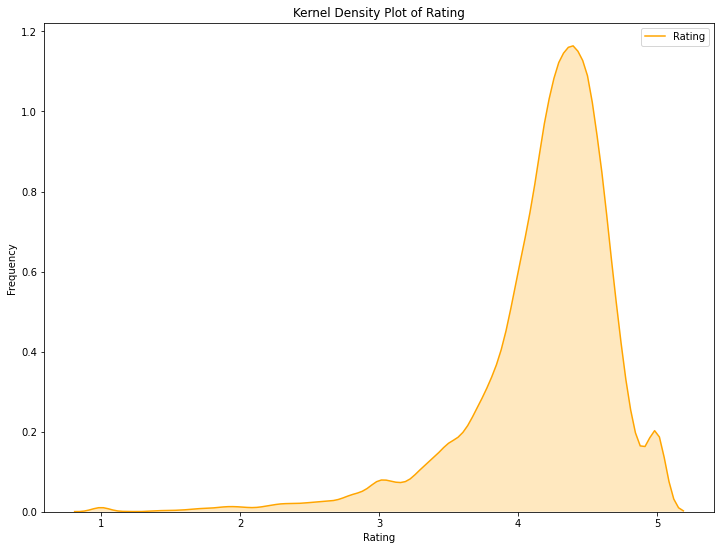

In [12]:
rcParams['figure.figsize'] = 12,9;
gr = sns.kdeplot(data.Rating, color="orange", shade = True);
gr.set_xlabel("Rating");
gr.set_ylabel("Frequency");
plt.title('Kernel Density Plot of Rating');

In [13]:
col='Rating'
v=data[col].value_counts().reset_index()
v=v.rename(columns={col:'count','index':col})
v['percent']=v['count'].apply(lambda x : 100*x/sum(v['count']))
v=v.sort_values(col)
trace = go.Bar(x=v[col], y=v["count"], name="Paid",  marker=dict(color="orange"))
y=[trace]
layout={'title':"Histogram of Rating with Bin Width of 0.1",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

#### Histogram with bin width of 0.5

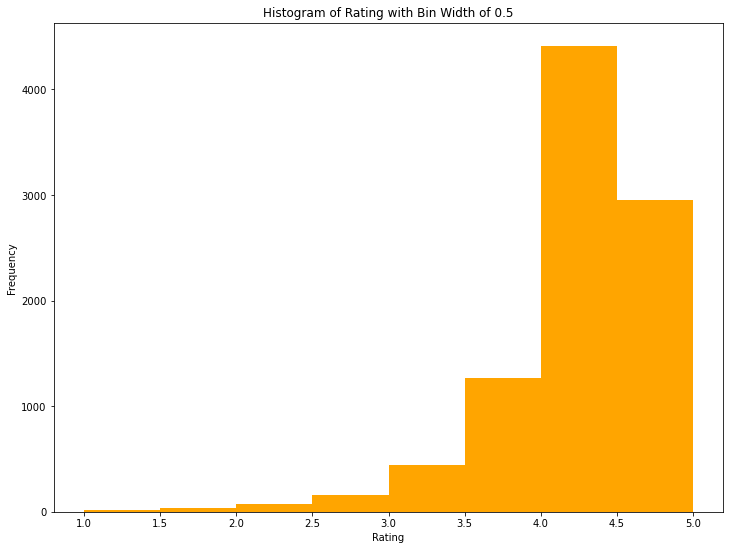

In [14]:
bins_list = [1,1.5,2,2.5,3,3.5,4,4.5,5]
plt.hist(data.Rating, bins=bins_list, color="orange")
plt.title('Histogram of Rating with Bin Width of 0.5')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### Histogram with bin width of 1 

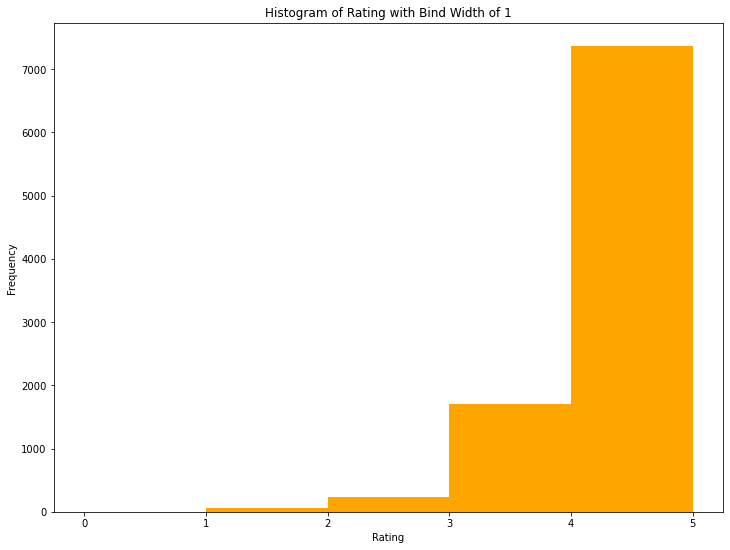

In [15]:
bins_list = [0,1,2,3,4,5]
plt.hist(data.Rating, bins=bins_list, color="orange")
plt.title('Histogram of Rating with Bind Width of 1')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The histograms above show that most of the rating are above 4, and mostly around 4 to 4.5. 

In [16]:
# Categorizing the Rating
r1 = data[data['Rating']<=1.5]
r2 = data[(1.5<data['Rating']) & (data['Rating']<=2)]
r3 = data[(2<data['Rating']) & (data['Rating']<=2.5)]
r4 = data[(2.5<data['Rating']) & (data['Rating']<=3)]
r5 = data[(3<data['Rating']) & (data['Rating']<=3.5)]
r6 = data[(3.5<data['Rating']) & (data['Rating']<=4)]
r7 = data[(4<data['Rating']) & (data['Rating']<=4.5)]
r8 = data[(4.5<data['Rating']) & (data['Rating']<=5)]

rbelow = data[data['Rating']<4.19]
rabove = data[data['Rating']>=4.19]

### 5-2. App

In [17]:
data['App'].describe()

count      10840
unique      9659
top       ROBLOX
freq           9
Name: App, dtype: object

In [18]:
# Unique "App" names
data['App'].value_counts().head(20)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
Zombie Catchers                                       6
Bowmasters                                            6
Bleacher Report: sports news, scores, & highlights    6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
Subway Surfers                                        6
Temple Run 2                                          6
Nick                                                  6
Helix Jump                                            6
Bubble Shooter                                        6
slither.io                                            6
Wish - Shopping Made Fun                              5
Netflix                                         

Note that there are multiple entries of the apps whose names are the same.

In [19]:
# Set the names of the apps as indces
data.set_index("App", inplace=True)
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


### 5-3. Category

In [20]:
data['Category'].describe()

count      10840
unique        33
top       FAMILY
freq        1972
Name: Category, dtype: object

In [21]:
# Unique "Cateogry"
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [22]:
print("There are", len(data['Category'].unique()) , "categories.")

There are 33 categories.


#### Distribution of Categories - Bar Plot

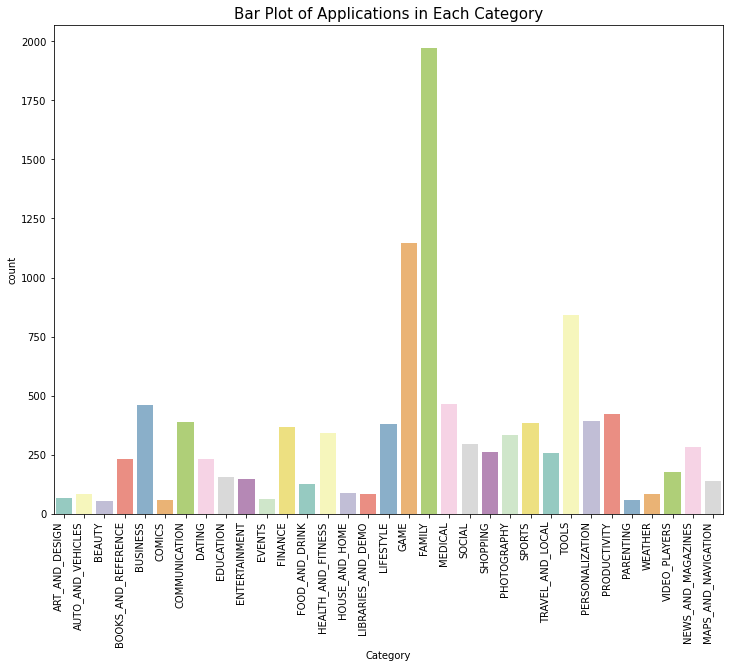

In [23]:
gc = sns.countplot(x="Category",data=data, palette = "Set3");
gc.set_xticklabels(gc.get_xticklabels(), rotation=90, ha="right");
gc
plt.title('Bar Plot of Applications in Each Category',size = 15);

#### Word Cloud of Categories

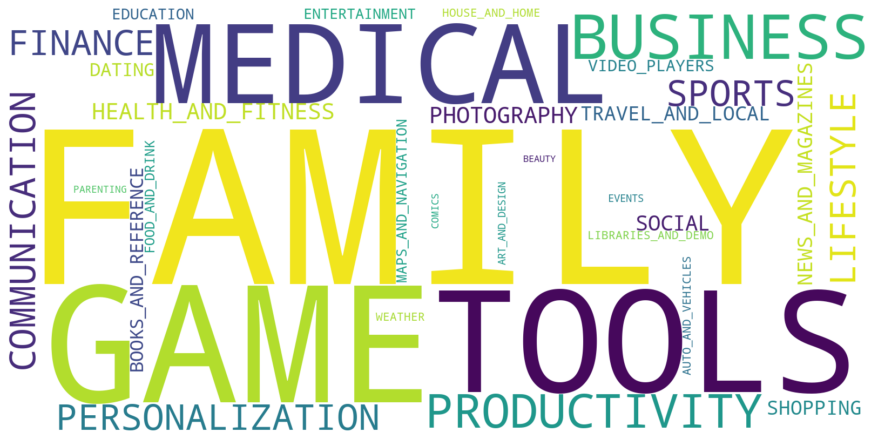

In [24]:
wordcloud = WordCloud(max_font_size=400, collocations=False, max_words=33, width=1600, height=800, background_color="white").generate(' '.join(data['Category']))
plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Category "Family" has the highest counts of apps, followed by "Games" and "Personalization."

#### Categories and Rating - Boxplot

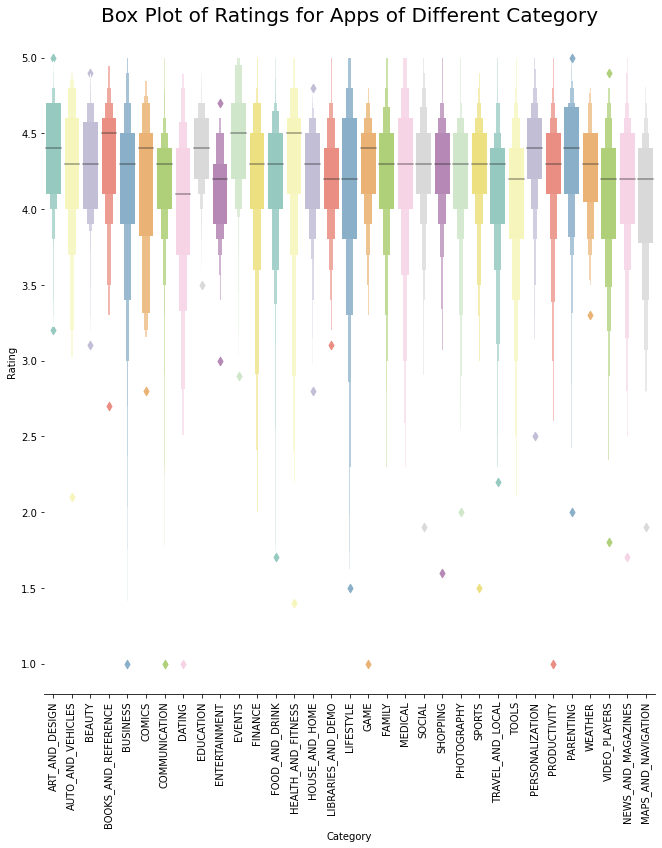

In [25]:
gcr = sns.catplot(x="Category",y="Rating",data=data, kind="boxen", height = 10 ,palette = "Set3")
gcr.despine(left=True)
gcr.set_xticklabels(rotation=90)
gcr = gcr.set_ylabels("Rating")
plt.title('Box Plot of Ratings for Apps of Different Category',size = 20);

Apps whose category is "Events" tend to have higher mean ratings, while "Dating" apps tend to have lower ratings. This is confirmed by checking the lowest and highest mean rating of the category as follow:

In [26]:
data[['Category', 'Rating']].groupby(['Category'], as_index=False).mean().sort_values('Rating').head(1)

,Category,Rating
7,DATING,3.970769


In [27]:
data[['Category', 'Rating']].groupby(['Category'], as_index=False).mean().sort_values('Rating').tail(1)

,Category,Rating
10,EVENTS,4.435556


#### Categories and Rating - Rating Below Mean vs. Rating Above Mean

In [28]:
len(rbelow), len(rabove)

(3274, 6092)

In [29]:
col='Category'

v1=rbelow[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)

v2=rabove[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Below Average Rating", marker=dict(color="blue"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Above Average Rating", marker=dict(color="red"))
y = [trace1, trace2]
layout={'title':"App Category"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

Both the apps that had above and below the average ratings showed similar trends regardless of categories. Therefore, no significant effect of categories on the rating can be observed.

### 5-4. Genres

In [30]:
data['Genres'].describe()

count     10840
unique      119
top       Tools
freq        842
Name: Genres, dtype: object

In [31]:
# Unique "Genres"
data['Genres'].value_counts()

Tools                           842
Entertainment                   623
Education                       549
Medical                         463
Business                        460
                               ... 
Strategy;Creativity               1
Music & Audio;Music & Video       1
Parenting;Brain Games             1
Books & Reference;Creativity      1
Lifestyle;Education               1
Name: Genres, Length: 119, dtype: int64

In [32]:
print( len(data['Genres'].unique()) , "genres")

119 genres


#### Distribution of Different Genres - Bar Plot

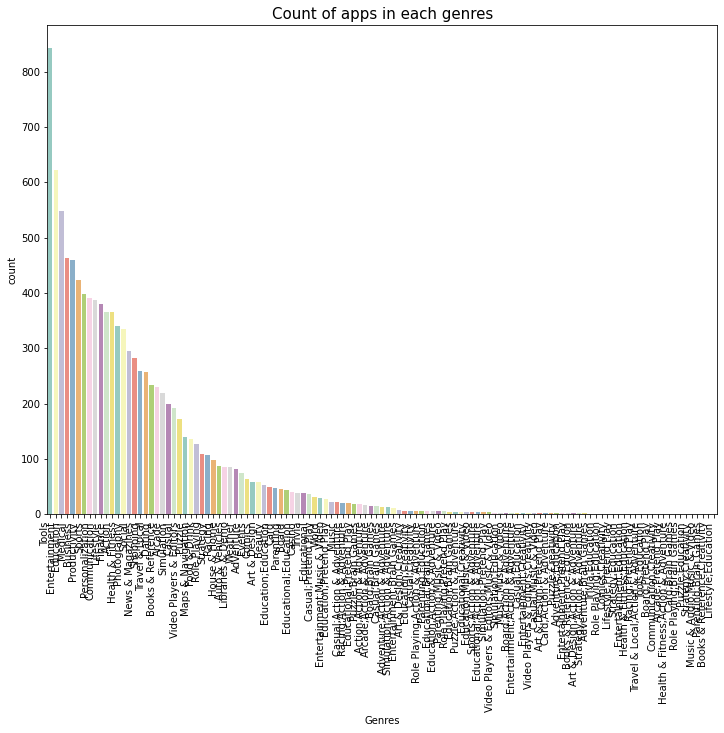

In [33]:
gg = sns.countplot(x="Genres",data=data, palette = "Set3", order=data['Genres'].value_counts().index);
gg.set_xticklabels(gg.get_xticklabels(), rotation=90, ha="right");
gg
plt.title('Count of apps in each genres',size = 15);

We can see that there is a skewed distribution for "Genres," which can be a potential cause for a bias. Therefore, decided to get rid of the sub genres (that starts after ";") and just use the bigger genres.

In [34]:
data['Genres'] = data['Genres'].str.split(';').str[0]

In [35]:
print( len(data['Genres'].unique()) , "genres")
print("\n", data['Genres'].unique())

48 genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


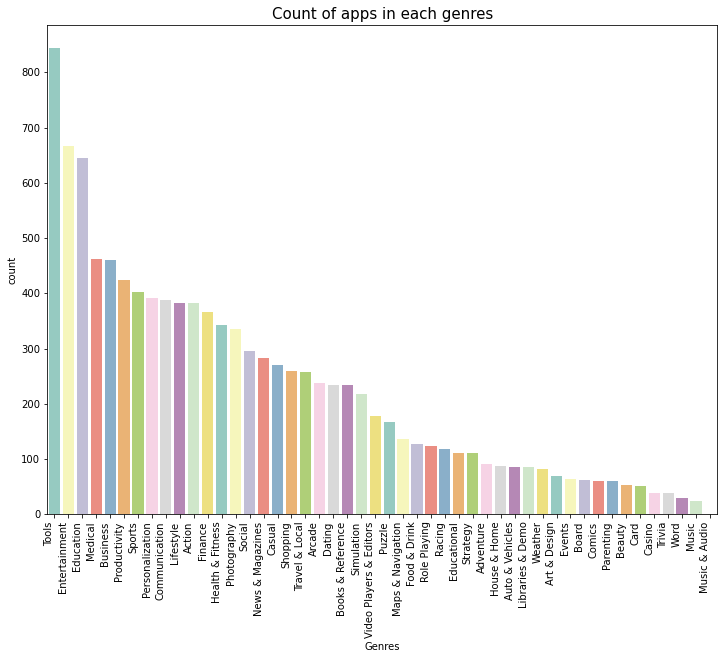

In [36]:
gg = sns.countplot(x="Genres",data=data, palette = "Set3",order=data['Genres'].value_counts().index);
gg.set_xticklabels(gg.get_xticklabels(), rotation=90, ha="right");
gg
plt.title('Count of apps in each genres',size = 15);

#### Genres and Rating

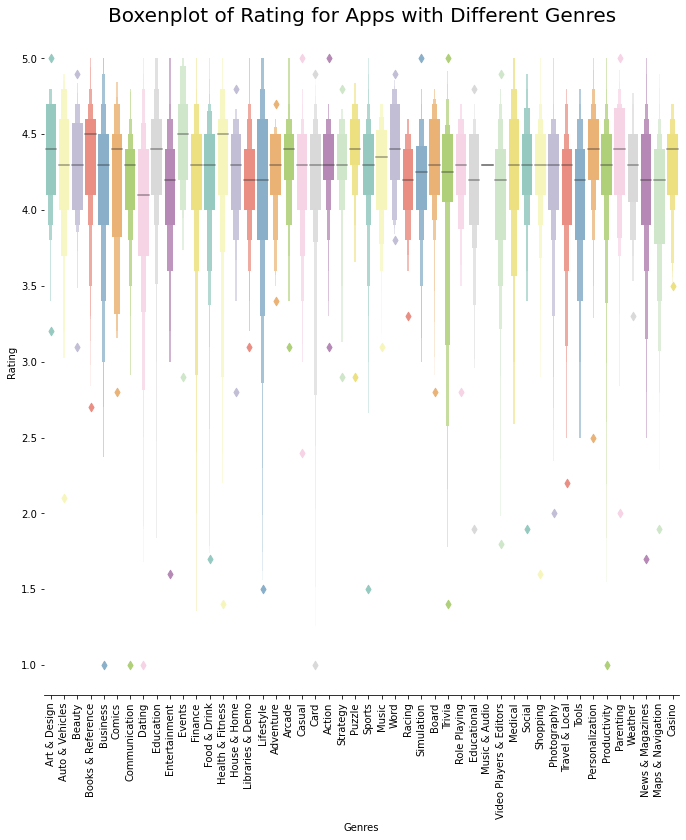

In [37]:
gg = sns.catplot(x="Genres",y="Rating",data=data, kind="boxen", height = 10 ,palette = "Set3")
gg.despine(left=True)
gg.set_xticklabels(rotation=90)
gg = gg.set_ylabels("Rating")
plt.title('Boxenplot of Rating for Apps with Different Genres',size = 20);

As shown in EDA of Catgory, the apps whose genre is "Events" tend to have higher ratings, while the "Dating" apps tend to have lower ratings. 

The graphs show that the Categories and Genres have many overlaps in values. 

#### Genres and Category

In [38]:
(data[data.Category != data.Genres]
 .groupby('Category')['Genres']
 .value_counts())

Category             Genres                 
ART_AND_DESIGN       Art & Design                65
AUTO_AND_VEHICLES    Auto & Vehicles             85
BEAUTY               Beauty                      53
BOOKS_AND_REFERENCE  Books & Reference          231
BUSINESS             Business                   460
                                               ... 
SPORTS               Sports                     384
TOOLS                Tools                      843
TRAVEL_AND_LOCAL     Travel & Local             258
VIDEO_PLAYERS        Video Players & Editors    175
WEATHER              Weather                     82
Name: Genres, Length: 71, dtype: int64

In [39]:
data[['Category', 'Genres']].nunique()

Category    33
Genres      48
dtype: int64

In [40]:
data[data.Category != data.Genres]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up


As shown, a lot of Genres and Category have the same values. 

### 5-6. Content Rating

In [41]:
data['Content Rating'].describe()

count        10840
unique           6
top       Everyone
freq          8714
Name: Content Rating, dtype: object

In [42]:
# Unique "Content Rating"
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Most of the apps are made for "Everyone."

#### Barplot of Content Rating

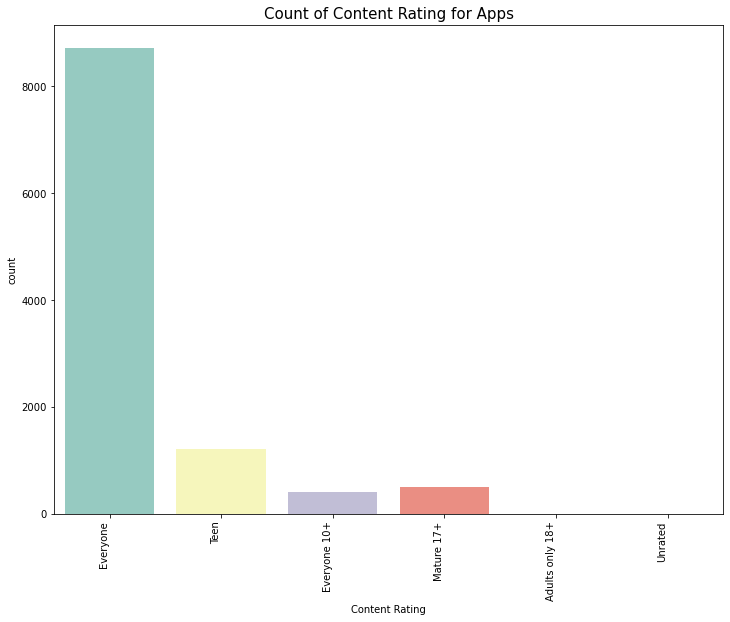

In [43]:
gcr = sns.countplot(x="Content Rating",data=data, palette = "Set3");
gcr.set_xticklabels(gcr.get_xticklabels(), rotation=90, ha="right");
gcr
plt.title('Count of Content Rating for Apps',size = 15);

There are only 2 entries of "Unrated," and 3 entries of "Adults only 18+."

In [44]:
data[data['Content Rating']=='Unrated']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,24-Jun-15,5.2,3.0 and up
DC Universe Online Map,TOOLS,4.1,1186,6.4M,"50,000+",Free,0,Unrated,Tools,27-Feb-12,1.3,2.3.3 and up


In [45]:
data[data['Content Rating']=='Adults only 18+']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9M,"500,000+",Free,0,Adults only 18+,Comics,4-Jul-18,1.1.7.0,4.1 and up
DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41M,"1,000,000+",Free,0,Adults only 18+,Sports,24-Jul-18,3.21.324,4.4 and up
Manga Books,COMICS,3.8,7326,Varies with device,"500,000+",Free,0,Adults only 18+,Comics,3-Aug-18,Varies with device,Varies with device


#### Content Rating and Rating - Box Plot

Text(0.5, 1.0, 'Box plot of Rating for Each Content Rating')

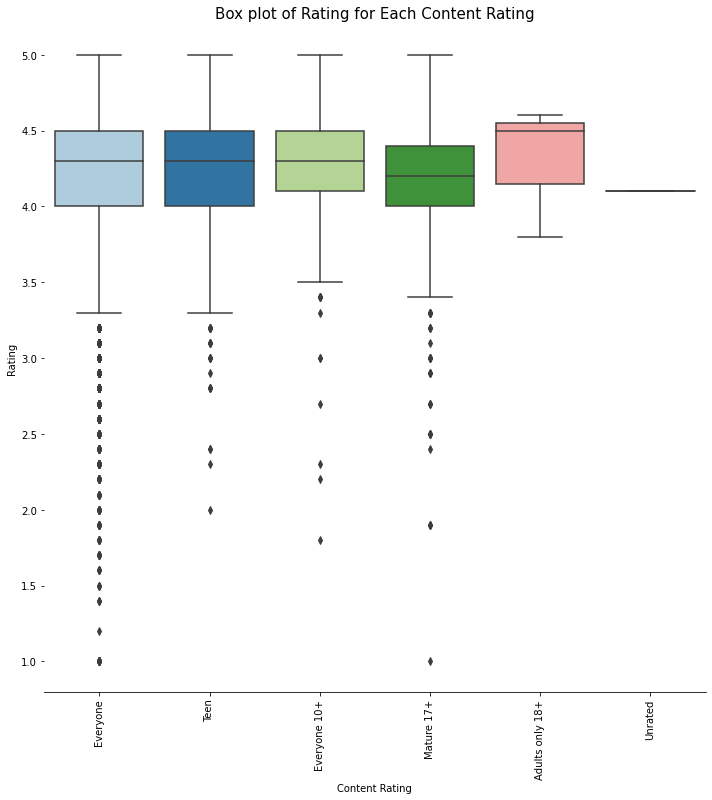

In [46]:
grcr = sns.catplot(x="Content Rating",y="Rating",data=data, kind="box", height = 10 ,palette = "Paired")
grcr.despine(left=True)
grcr.set_xticklabels(rotation=90)
grcr = grcr.set_ylabels("Rating")
plt.title('Box plot of Rating for Each Content Rating',size = 15)

Apps with the content rating of "Adults only 18+" seem to have higher rating, while the apps with the content rating of "Everyone" tend to have wide spread distribution of rating, ranging from 1 to 5. 

### 5-7. Reviews

In [47]:
data['Reviews'].describe()

count     10840
unique     6001
top           0
freq        596
Name: Reviews, dtype: object

In [48]:
pd.to_numeric(data['Reviews'],errors='coerce')

App
Photo Editor & Candy Camera & Grid & ScrapBook           159
Coloring book moana                                      967
U Launcher Lite – FREE Live Cool Themes, Hide Apps     87510
Sketch - Draw & Paint                                 215644
Pixel Draw - Number Art Coloring Book                    967
                                                       ...  
Sya9a Maroc - FR                                          38
Fr. Mike Schmitz Audio Teachings                           4
Parkinson Exercices FR                                     3
The SCP Foundation DB fr nn5n                            114
iHoroscope - 2018 Daily Horoscope & Astrology         398307
Name: Reviews, Length: 10840, dtype: int64

In [49]:
data['Reviews'].describe()

count     10840
unique     6001
top           0
freq        596
Name: Reviews, dtype: object

In [50]:
# Convert "Reviews" into integers
data['Reviews'] = data['Reviews'].apply(lambda x: int(x))
data['Reviews'].head()

App
Photo Editor & Candy Camera & Grid & ScrapBook           159
Coloring book moana                                      967
U Launcher Lite – FREE Live Cool Themes, Hide Apps     87510
Sketch - Draw & Paint                                 215644
Pixel Draw - Number Art Coloring Book                    967
Name: Reviews, dtype: int64

In [51]:
# Unique "Reviews"
data['Reviews'].value_counts().head(30)

0     596
1     272
2     214
3     175
4     137
5     108
6      97
7      90
8      74
9      65
10     64
12     60
11     52
13     49
17     48
14     41
19     41
21     35
20     35
16     35
15     31
25     30
30     30
24     30
38     29
18     27
22     26
27     25
23     25
33     24
Name: Reviews, dtype: int64

#### Distribution of Number of Reviews   - Kernel Density Plot

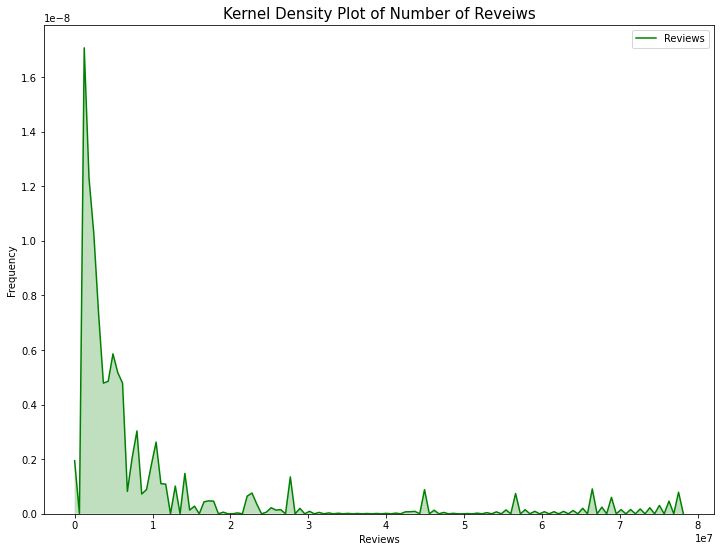

In [52]:
rcParams['figure.figsize'] = 12, 9
g = sns.kdeplot(data.Reviews, color="green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Kernel Density Plot of Number of Reveiws',size = 15);

#### Number of Reviews - Histogram

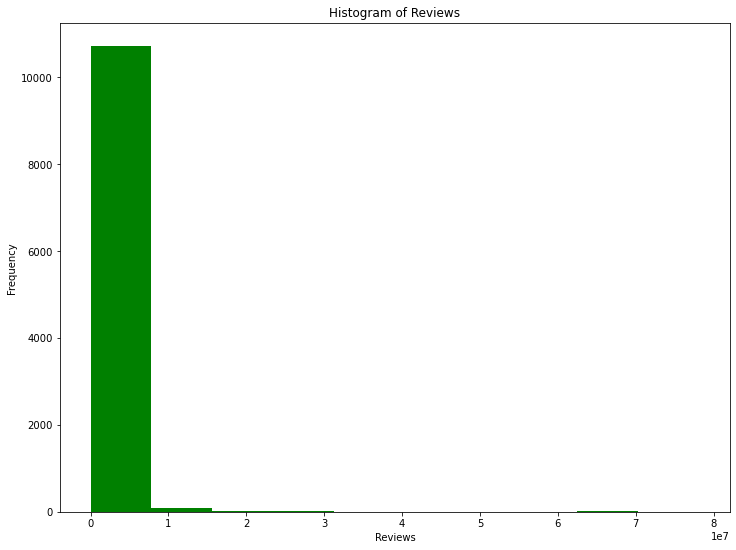

In [53]:
plt.hist(data.Reviews, color='green')
plt.title('Histogram of Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

In [54]:
# Median of Number of Reviews
print("min:", data['Reviews'].min(), "median:", data['Reviews'].median(), "mean:", data['Reviews'].mean(), "max:", data['Reviews'].max())

min: 0 median: 2094.0 mean: 444152.89603321033 max: 78158306


The median number of reivews is 2094, while the mean is 444153. This and the graphs above suggest that the number of reviews are skewed to left. 

To get further insight into the number of reviews, the number of reviews below the median is further examined.

In [55]:
# Categorizing the Number of Reviews
nrbelowmed = data[data['Reviews']<=2094]
nrabovemed = data[data['Reviews']>2094]

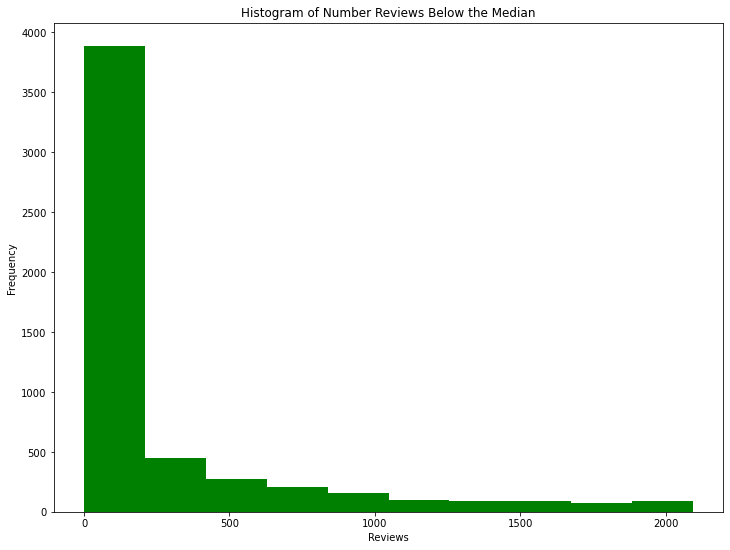

In [56]:
plt.hist(nrbelowmed['Reviews'], color='green')
plt.title('Histogram of Number Reviews Below the Median')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

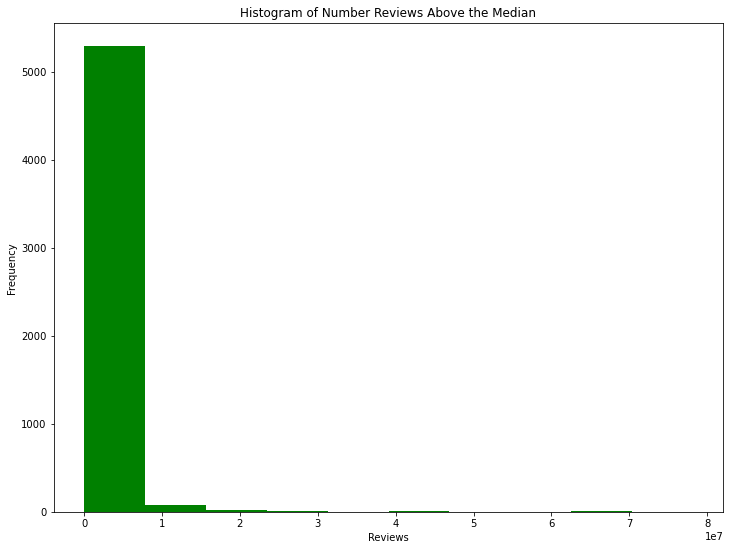

In [57]:
plt.hist(nrabovemed['Reviews'], color='green')
plt.title('Histogram of Number Reviews Above the Median')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

#### Number of Reviews and Rating 

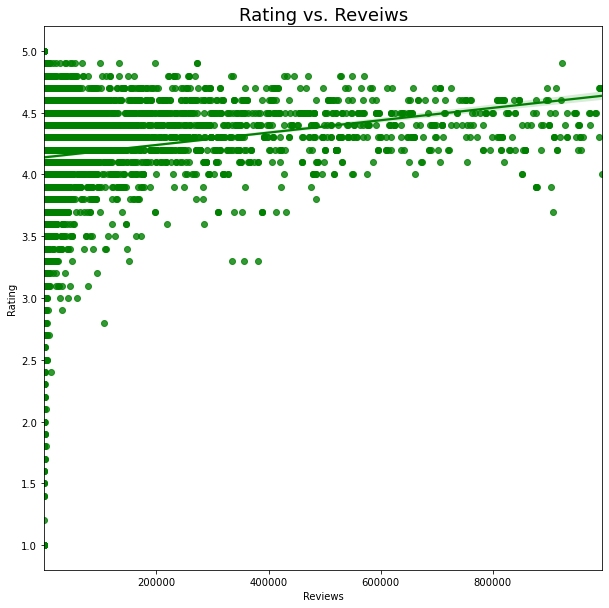

In [58]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'green',data=data[data['Reviews']<1000000]);
plt.title('Rating vs. Reveiws',size = 18);

### 5-8. Size

In [59]:
data['Size'].describe()

count                  10840
unique                   461
top       Varies with device
freq                    1695
Name: Size, dtype: object

In [60]:
# Unique "Size"
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Can see that there are values with different measurement (i.e. ks and Ms) and some values "Varies with device."

In [61]:
data['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
963k                     1
459k                     1
961k                     1
772k                     1
569k                     1
Name: Size, Length: 461, dtype: int64

In [62]:
data[data['Size']== 'Varies with device']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,14-Jul-18,Varies with device,2.3.3 and up
Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,30-Jul-18,Varies with device,Varies with device
Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,25-May-18,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...
My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,24-Jul-18,Varies with device,Varies with device
Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,27-Sep-17,Varies with device,4.4 and up
Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,23-May-18,Varies with device,Varies with device


In [63]:
# Removing "M"s and replace "k" by dividing it by 1000 -  cpmvert it to Ms
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

data['Size'] = data['Size'].apply(lambda x: float(x))

In [64]:
data['Size'].value_counts()

11.000    198
12.000    196
14.000    194
13.000    191
15.000    184
         ... 
0.027       1
0.642       1
0.647       1
0.039       1
0.942       1
Name: Size, Length: 459, dtype: int64

C:\Users\chloe\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\chloe\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



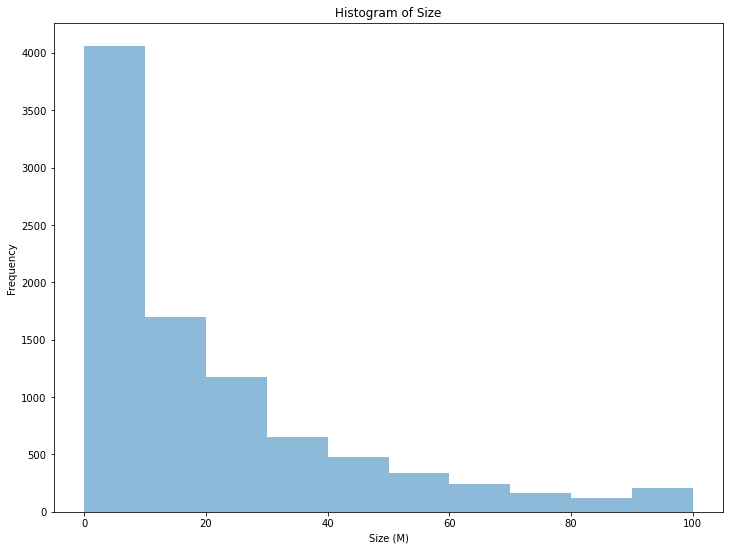

In [65]:
# Histogram
plt.hist(data['Size'], alpha=0.5)
plt.title('Histogram of Size')
plt.xlabel('Size (M)')
plt.ylabel('Frequency')
plt.show()

#### Size and Rating

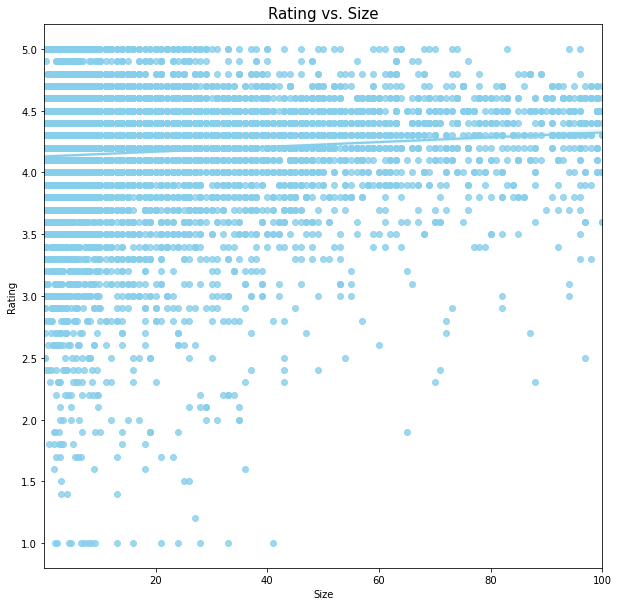

In [66]:
plt.figure(figsize = (10,10))
sns.regplot(x="Size", y="Rating", color = 'skyblue', data=data);
plt.title('Rating vs. Size',size = 15);

The regressing plot show that it can be implied that the greater the size of the application the greater the rating. 

### 5-9. Installs

In [67]:
data['Installs'].describe()

count          10840
unique            21
top       1,000,000+
freq            1579
Name: Installs, dtype: object

In [68]:
# Unique "Installs"
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [69]:
data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [70]:
# Remove "+"s
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

Note that 0+ is merged with 0s.

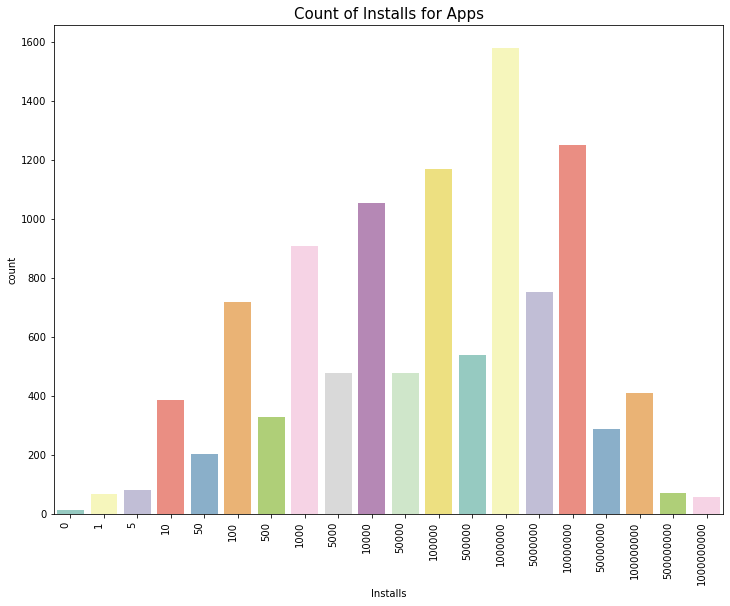

In [71]:
gi = sns.countplot(x="Installs",data=data, palette = "Set3");
gi .set_xticklabels(gi.get_xticklabels(), rotation=90, ha="right");
gi
plt.title('Count of Installs for Apps',size = 15);

In [72]:
col='Installs'

v1=rabove[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)

v2=rbelow[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Above Average Rating", marker=dict(color="red"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Below Average Rating", marker=dict(color="blue"))
y = [trace1, trace2]

layout={'title':"Number of Installs",'xaxis':{'title':"Installs"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)


There is no distinct difference in patterns between the apps with above averagerating and below average rating in number of installs. 

### 5-10. Type

In [73]:
data['Type'].describe()

count     10839
unique        2
top        Free
freq      10039
Name: Type, dtype: object

In [74]:
# Unique "Type"
data['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [75]:
data['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

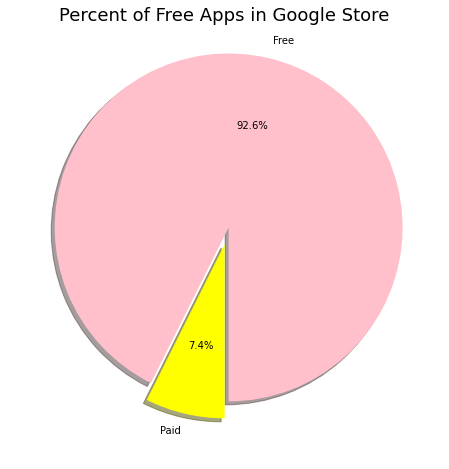

In [76]:
# Plot pie chart
labels =data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)

colors = ["pink","yellow"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free Apps in Google Store',size = 18)
plt.show()

In [77]:
# 0 - Free, 1 - Paid
# df['Type'] = pd.factorize(df['Type'])[0]
#print(df.dtypes)

In [78]:
col = "Type"
grouped = data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.1, 0])
layout = {'title': 'Percentage of Apps that are Paid and Free'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [79]:
col = "Type"
grouped = rbelow[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.1, 0])
layout = {'title': 'Percentage of Apps that are Paid and Free for Apps whose Rating are BELOW Average'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [80]:
col = "Type"
grouped = rabove[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.1, 0])
layout = {'title': 'Percentage of Apps that are Paid and Free for Apps whose Rating are ABOVE Average'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [81]:
col='Type'

v1=rabove[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)

v2=rbelow[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Above Average Rating", marker=dict(color="red"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Below Average Rating", marker=dict(color="blue"))
y = [trace1, trace2]

layout={'title':"Number of Applications for Each Type",'xaxis':{'title':"Installs"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)


Free apps tend to have higher ratings. 

### 5-11. Price

In [82]:
data['Price'].describe()

count     10840
unique       92
top           0
freq      10040
Name: Price, dtype: object

In [83]:
# Unique "Price"
data['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [84]:
# Remove the dollar sign and make the variable float
data.Price = data.Price.apply(lambda x: x.replace('$',''))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [85]:
data['Price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

Max for price is $400!

In [86]:
data['Price'].value_counts()

0.00    10040
0.99      148
2.99      129
1.99       73
4.99       72
        ...  
1.20        1
1.59        1
2.56        1
1.61        1
1.04        1
Name: Price, Length: 92, dtype: int64

#### Histogram of Price

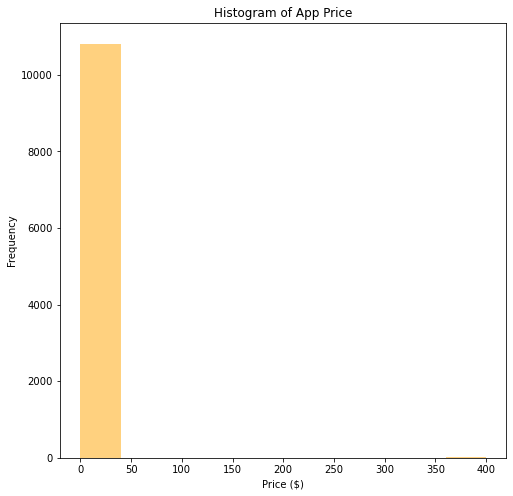

In [87]:
# Histogram
plt.hist(data['Price'], alpha=0.5,color='orange')
plt.title('Histogram of App Price')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

Most of the applications seem to be below $50.

In [88]:
# Catagorizing the Apps by Price
pbelow = data[data['Price']<=1]
pabove = data[data['Price']>1]

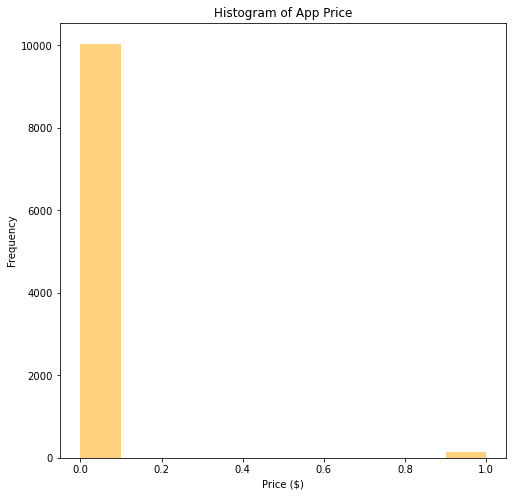

In [89]:
plt.hist(pbelow['Price'], alpha=0.5,color='orange')
plt.title('Histogram of App Price')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

#### Price and Rating

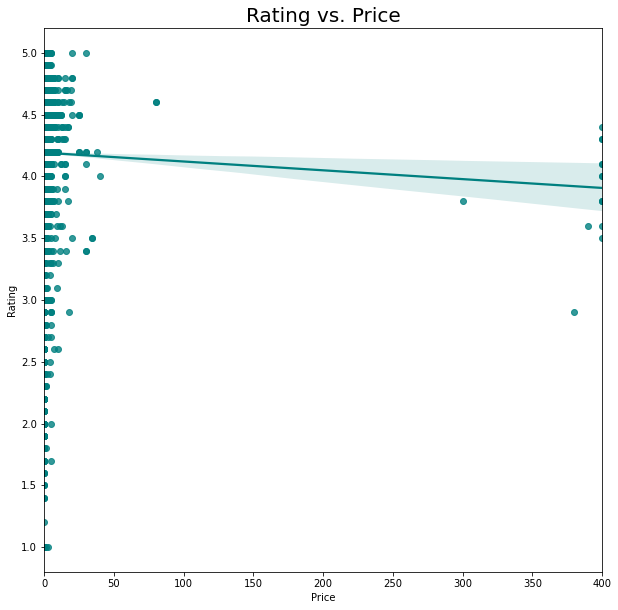

In [90]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'teal',data=data);
plt.title('Rating vs. Price',size = 20);

The rating tends to decrease with the increase in price. 

### 5-12. Last Updated

In [91]:
data['Last Updated'].describe()

count        10840
unique        1377
top       3-Aug-18
freq           326
Name: Last Updated, dtype: object

In [92]:
# Unique "Installs"
data['Last Updated'].unique()

array(['7-Jan-18', '15-Jan-18', '1-Aug-18', ..., '20-Jan-14', '16-Feb-14',
       '23-Mar-14'], dtype=object)

In [93]:
data['Last Updated'].value_counts()

3-Aug-18     326
2-Aug-18     304
31-Jul-18    294
1-Aug-18     285
30-Jul-18    211
            ... 
14-Sep-15      1
18-Jan-12      1
24-May-15      1
24-Apr-16      1
1-Sep-16       1
Name: Last Updated, Length: 1377, dtype: int64

In [94]:
#Convert to datetime object
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated'].describe()

count                   10840
unique                   1377
top       2018-08-03 00:00:00
freq                      326
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last Updated, dtype: object

In [95]:
data['Last Updated'].max() 

Timestamp('2018-08-08 00:00:00')

In [96]:
data['Last Updated'].min()

Timestamp('2010-05-21 00:00:00')

In order to include "Last Updated" into the machine learning model, I have decided to only select the month that the applications have been last updated. 

In [97]:
data['Month'] = data['Last Updated'].dt.month

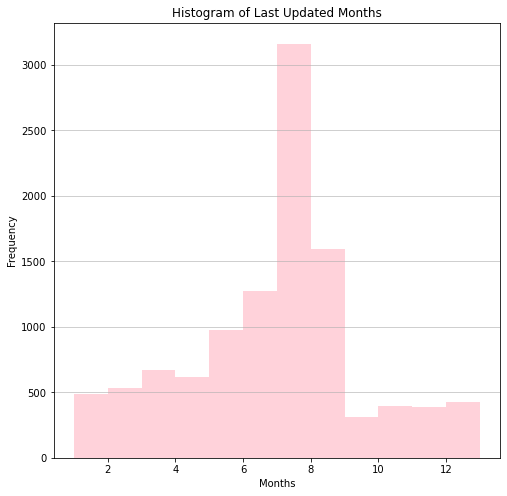

In [98]:
bins_list = [1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.hist(data['Month'],bins=bins_list,color='pink', alpha=0.7)
plt.grid(axis='y', alpha=0.75);
plt.xlabel('Months');
plt.ylabel('Frequency');
plt.title('Histogram of Last Updated Months');

In [99]:
col='Month'
v1=data[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], marker=dict())
layout={'title':"Number of added over the month",'xaxis':{'title':"months"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

Interestingly, there were the most number of apps added in the month of July (7).

#### Last Updated Month and Rating

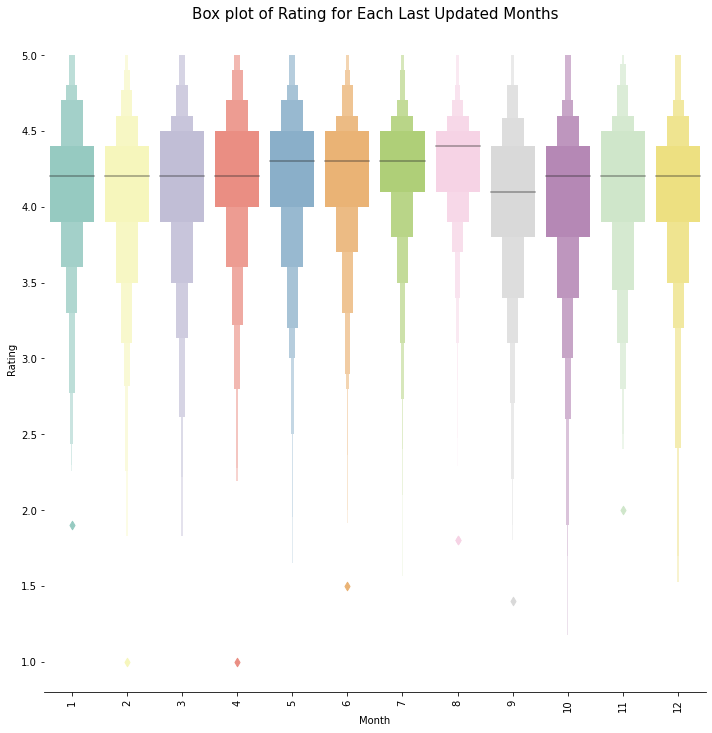

In [100]:
gg = sns.catplot(x="Month",y="Rating",data=data, kind="boxen", height = 10 ,palette = "Set3")
gg.despine(left=True)
gg.set_xticklabels(rotation=90)
gg = gg.set_ylabels("Rating")
plt.title('Box plot of Rating for Each Last Updated Months',size = 15);

### 5-13. Current Ver

In [101]:
data['Current Ver'].describe()

count                  10832
unique                  2783
top       Varies with device
freq                    1459
Name: Current Ver, dtype: object

In [102]:
# Unique "Current Ver"
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

### 5-14. Android Ver

In [103]:
data['Android Ver'].describe()

count          10838
unique            33
top       4.1 and up
freq            2451
Name: Android Ver, dtype: object

In [104]:
# Unique "Android Ver"
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

## 6. Export the Data

In [105]:
data.to_csv('googleplaystore_1eda.csv', index = False)

## III. Preprocessing

#### - Given all these variables, can we predict when someone updates for the last time?
#### - Given the state of the applciations, can we predict what the rating of the applications would be? 

In [106]:
from sklearn import __version__ as sklearn_version
from sklearn import metrics, svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [107]:
# Sort by "Category"
data.sort_values("Category", inplace = True)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        10840 non-null  object        
 1   Rating          9366 non-null   float64       
 2   Reviews         10840 non-null  int64         
 3   Size            9145 non-null   float64       
 4   Installs        10840 non-null  int64         
 5   Type            10839 non-null  object        
 6   Price           10840 non-null  float64       
 7   Content Rating  10840 non-null  object        
 8   Genres          10840 non-null  object        
 9   Last Updated    10840 non-null  datetime64[ns]
 10  Current Ver     10832 non-null  object        
 11  Android Ver     10838 non-null  object        
 12  Month           10840 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), o

"Current Ver" and "Android Ver" will not be included in our model, and therefore will be dropped. 

In [109]:
df = data
df = df.drop(columns = ['Current Ver', 'Android Ver'], axis=1) #axis=1: drop column
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Month
App,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.00,Everyone,Art & Design,2018-01-07,1
How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2,100000,Free,0.00,Everyone,Art & Design,2018-07-11,7
UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24.0,500000,Free,0.00,Everyone,Art & Design,2018-08-02,8
Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,5000000,Free,0.00,Everyone,Art & Design,2018-07-14,7
PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.7,158,11.0,10000,Free,0.00,Everyone,Art & Design,2017-11-29,11
...,...,...,...,...,...,...,...,...,...,...,...
wetter.com - Weather and Radar,WEATHER,4.2,189310,38.0,10000000,Free,0.00,Everyone,Weather,2018-08-06,8
Yahoo Weather,WEATHER,4.4,1312037,NaN,10000000,Free,0.00,Everyone,Weather,2018-08-01,8
Klara weather,WEATHER,4.6,36900,4.8,500000,Free,0.00,Everyone,Weather,2018-07-28,7


## 1. Integer Encoding 

### Convert all the variables into numerical format

In [110]:
df_int = df
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        10840 non-null  object        
 1   Rating          9366 non-null   float64       
 2   Reviews         10840 non-null  int64         
 3   Size            9145 non-null   float64       
 4   Installs        10840 non-null  int64         
 5   Type            10839 non-null  object        
 6   Price           10840 non-null  float64       
 7   Content Rating  10840 non-null  object        
 8   Genres          10840 non-null  object        
 9   Last Updated    10840 non-null  datetime64[ns]
 10  Month           10840 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 1016.2+ KB


"Category", "Type", "Content Rating", and "Genres" are string objects and therefore will be converted into numeric values

#### 1) Cateogry

In [111]:
# Cleaning Categories into integers
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_int"] = df["Category"].map(category_dict).astype(int)

In [112]:
category_dict

{'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 1,
 'BEAUTY': 2,
 'BOOKS_AND_REFERENCE': 3,
 'BUSINESS': 4,
 'COMICS': 5,
 'COMMUNICATION': 6,
 'DATING': 7,
 'EDUCATION': 8,
 'ENTERTAINMENT': 9,
 'EVENTS': 10,
 'FAMILY': 11,
 'FINANCE': 12,
 'FOOD_AND_DRINK': 13,
 'GAME': 14,
 'HEALTH_AND_FITNESS': 15,
 'HOUSE_AND_HOME': 16,
 'LIBRARIES_AND_DEMO': 17,
 'LIFESTYLE': 18,
 'MAPS_AND_NAVIGATION': 19,
 'MEDICAL': 20,
 'NEWS_AND_MAGAZINES': 21,
 'PARENTING': 22,
 'PERSONALIZATION': 23,
 'PHOTOGRAPHY': 24,
 'PRODUCTIVITY': 25,
 'SHOPPING': 26,
 'SOCIAL': 27,
 'SPORTS': 28,
 'TOOLS': 29,
 'TRAVEL_AND_LOCAL': 30,
 'VIDEO_PLAYERS': 31,
 'WEATHER': 32}

#### 2) Genre

In [113]:
GenresVal = df.Genres.unique()
genres_dict = {}
for i in range(len(GenresVal)):
    genres_dict[GenresVal[i]] = i
df['Genres_int'] = df_int['Genres'].map(genres_dict).astype(int)

In [114]:
genres_dict

{'Art & Design': 0,
 'Auto & Vehicles': 1,
 'Beauty': 2,
 'Books & Reference': 3,
 'Business': 4,
 'Comics': 5,
 'Communication': 6,
 'Dating': 7,
 'Education': 8,
 'Entertainment': 9,
 'Events': 10,
 'Casual': 11,
 'Simulation': 12,
 'Puzzle': 13,
 'Role Playing': 14,
 'Strategy': 15,
 'Educational': 16,
 'Adventure': 17,
 'Health & Fitness': 18,
 'Lifestyle': 19,
 'Arcade': 20,
 'Action': 21,
 'Racing': 22,
 'Video Players & Editors': 23,
 'Sports': 24,
 'Trivia': 25,
 'Card': 26,
 'Board': 27,
 'Music & Audio': 28,
 'Music': 29,
 'Finance': 30,
 'Food & Drink': 31,
 'Word': 32,
 'Casino': 33,
 'House & Home': 34,
 'Libraries & Demo': 35,
 'Maps & Navigation': 36,
 'Medical': 37,
 'News & Magazines': 38,
 'Parenting': 39,
 'Personalization': 40,
 'Photography': 41,
 'Productivity': 42,
 'Shopping': 43,
 'Social': 44,
 'Tools': 45,
 'Travel & Local': 46,
 'Weather': 47}

#### 3) Type

In [115]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type_int'] = df['Type'].map(type_cat)

#### 4) Content Rating

In [116]:
RatingVal = df['Content Rating'].unique()
rating_dict = {}
for i in range(len(RatingVal)):
    rating_dict[RatingVal[i]] = i
df['ContentRating_int'] = df['Content Rating'].map(rating_dict).astype(int)

In [117]:
rating_dict

{'Everyone': 0,
 'Teen': 1,
 'Everyone 10+': 2,
 'Mature 17+': 3,
 'Adults only 18+': 4,
 'Unrated': 5}

##### Make sure that other variables are all numeric as well

In [118]:
# Change datatype
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = pd.to_numeric(df['Price'])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Category           10840 non-null  object        
 1   Rating             9366 non-null   float64       
 2   Reviews            10840 non-null  int64         
 3   Size               9145 non-null   float64       
 4   Installs           10840 non-null  int64         
 5   Type               10839 non-null  object        
 6   Price              10840 non-null  float64       
 7   Content Rating     10840 non-null  object        
 8   Genres             10840 non-null  object        
 9   Last Updated       10840 non-null  datetime64[ns]
 10  Month              10840 non-null  int64         
 11  Category_int       10840 non-null  int32         
 12  Genres_int         10840 non-null  int32         
 13  

## 2. Missing Values 

In [120]:
total=df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.000000
Rating,1474,0.135978
Reviews,0,0.000000
Size,1695,0.156365
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000
Last Updated,0,0.000000


Rating and Size have over 1000 missing values.

I will impute the missing values with the means for the Rating and Size.

### 2-1) Imputed with Mean

#### Rating - impute with mean

In [121]:
# Replace "NaN" with mean 
imputer = SimpleImputer()
df['Rating_mean'] = imputer.fit_transform(df[['Rating']])

#### Size - Impute with mean

In [122]:
# Replace "NaN" with mean 
df['Size_mean'] = imputer.fit_transform(df[['Size']])

In [123]:
total=df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.000000
Rating,1474,0.135978
Reviews,0,0.000000
Size,1695,0.156365
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000
Last Updated,0,0.000000


### 2-2) Imputed with Median

#### Rating - impute with median

In [124]:
# Replace "NaN" with median
df['Rating_med'] = imputer.fit_transform(df[['Rating']])

#### Size - impute with median

In [125]:
# Replace "NaN" with median
df['Size_med'] = imputer.fit_transform(df[['Size']])

In [126]:
total=df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.000000
Rating,1474,0.135978
Reviews,0,0.000000
Size,1695,0.156365
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000
Last Updated,0,0.000000


## 3. Dummy Coding 

##### Dummy Coding
df2 is a new dataframe that contains dummy coded variables. 

In [127]:
# for dummy variable encoding for Categories
df2 = pd.get_dummies(df, columns=['Category', 'Genres', 'Content Rating', 'Type'],drop_first=True)

In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Rating                          9366 non-null   float64       
 1   Reviews                         10840 non-null  int64         
 2   Size                            9145 non-null   float64       
 3   Installs                        10840 non-null  int64         
 4   Price                           10840 non-null  float64       
 5   Last Updated                    10840 non-null  datetime64[ns]
 6   Month                           10840 non-null  int64         
 7   Category_int                    10840 non-null  int32         
 8   Genres_int                      10840 non-null  int32         
 9   Type_int                        10840 non-null  int64         
 10  ContentR

##### Impute

In [129]:
#Impute with Median
df2['Rating'] = imputer.fit_transform(df2[['Rating']])

In [130]:
df2['Size'] = imputer.fit_transform(df2[['Size']])

In [131]:
df2.head()

,Rating,Reviews,Size,Installs,Price,Last Updated,Month,Category_int,Genres_int,Type_int,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Paid
App,,,,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.00000,10000,0.0,2018-01-07,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
How to draw Ladybug and Cat Noir,3.8,564,9.20000,100000,0.0,2018-07-11,7,0,0,0,...,0,0,0,0,1,0,0,0,0,0
UNICORN - Color By Number & Pixel Art Coloring,4.7,8145,24.00000,500000,0.0,2018-08-02,8,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Floor Plan Creator,4.1,36639,21.51653,5000000,0.0,2018-07-14,7,0,0,0,...,0,0,0,0,1,0,0,0,0,0
PIP Camera - PIP Collage Maker,4.7,158,11.00000,10000,0.0,2017-11-29,11,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [132]:
df2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated',
       'Month', 'Category_int', 'Genres_int', 'Type_int', 'ContentRating_int',
       'Rating_mean', 'Size_mean', 'Rating_med', 'Size_med',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_

## IV. Training and Modeling

### Set Up for Evaluation of Models Using Different Metrics 
To evaluate models, decided 

In [133]:
# Define "Evaluationmatrix"
def Evaluationmatrix(y_true, y_predict):
    print ('R Squared Score: '+ str(metrics .r2_score(y_true,y_predict)))
    print ('Mean Absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))

In [134]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['R Squared Score'] = metrics.r2_score(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    return dict_matrix

#### Predicting the rating of applications in Google Play App Store, given varaibles - category, reviews, size, installs, price and content rating.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to Real time Weather Forecast
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Category           10840 non-null  object        
 1   Rating             9366 non-null   float64       
 2   Reviews            10840 non-null  int64         
 3   Size               9145 non-null   float64       
 4   Installs           10840 non-null  int64         
 5   Type               10839 non-null  object        
 6   Price              10840 non-null  float64       
 7   Content Rating     10840 non-null  object        
 8   Genres             10840 non-null  object        
 9   Last Updated       10840 non-null  datetime64[ns]
 10  Month              10840 non-null  int64         
 11  Category_int       10840 non-null  int32         
 12  Genres_int         10840 non-null  int32         
 13  


## 1. Integer Encoded + Median Imputed
##### a) Feature selection

In [136]:
# Features selection
features = ['Category_int', 'Size_med', 'Installs', 'Type_int', 'Price','ContentRating_int', 'Genres_int', 'Month']
X = df[features]

In [137]:
# Label selection
y=df.Rating_med

In [138]:
# For testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [139]:
X_train.shape, X_test.shape

((7588, 8), (3252, 8))

In [140]:
y_train.shape, y_test.shape

((7588,), (3252,))

In [141]:
X_defaults_median = X_train.median()
X_defaults_median

Category_int             14.0
Size_med                 18.0
Installs             100000.0
Type_int                  0.0
Price                     0.0
ContentRating_int         0.0
Genres_int               22.0
Month                     7.0
dtype: float64

In [142]:
y_defaults_median = y_train.median()
y_defaults_median

4.2

##### b) Apply imputation on both train and test splits

In [143]:
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [144]:
y_tr = y_train.fillna(y_defaults_median)
y_te = y_test.fillna(y_defaults_median)

##### c) Scale the data

In [145]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

### 1) Linear Regression Model

In [146]:
# Train the model on the train split
lm = LinearRegression()
lm.fit(X_tr_scaled, y_tr)

LinearRegression()

In [147]:
#make predictions using the model on both train and test splits
y_te_pred = lm.predict(X_te_scaled)

In [148]:
results = y_te_pred

In [149]:
#lr_cm=confusion_matrix(y_te,y_te_pred)
#lr_ac=accuracy_score(y_te,y_te_pred)
#print('LogisticRegression_accuracy:',lr_ac)

##### Assess model performance

In [150]:
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_te,results),orient = 'index')
resultsdf = resultsdf.transpose()

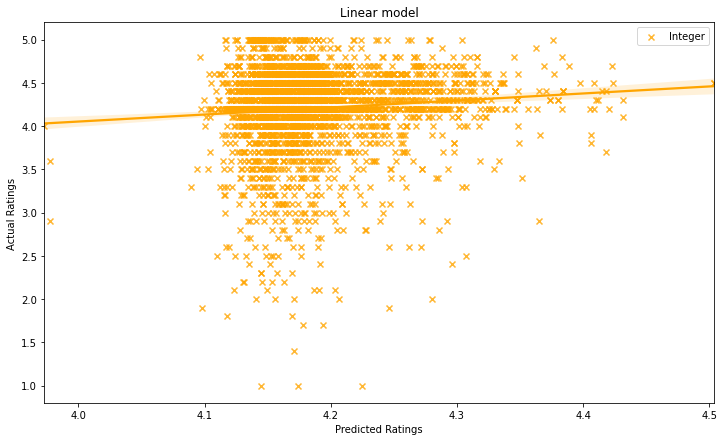

In [151]:
plt.figure(figsize=(12,7))
sns.regplot(results,y_te,color='orange', label = 'Integer', marker = 'x')
plt.legend()
plt.title('Linear model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

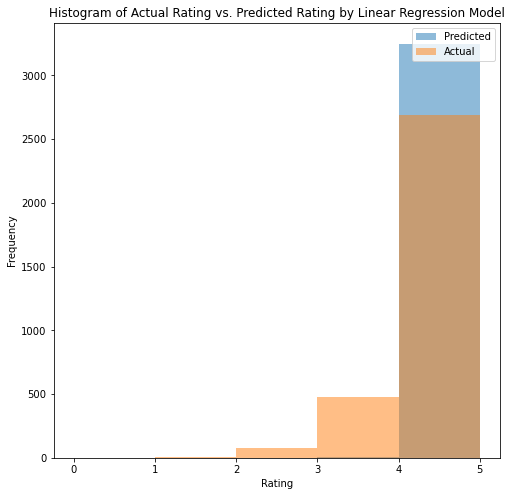

In [152]:
bins_list = [0,1,2,3,4,5]
plt.hist(results, bins_list, alpha=0.5, label='Predicted')
plt.hist(y_te, bins_list, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by Linear Regression Model')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

For each actual rating values, what did the model predict? 

In [153]:
print(results.mean(), results.std())

4.186988339767238 0.05267327501840234


### 2) Elipson-Support Vector Regression (SVR) Model

In [154]:
model2 = svm.SVR()
model2.fit(X_train,y_train)

results2 = model2.predict(X_test)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,results2, name = 'SVM - Integer'),ignore_index = True)

In [155]:
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00654918,0.312813,0.21881
1,SVM - Integer,0.0195599,0.296857,0.215944


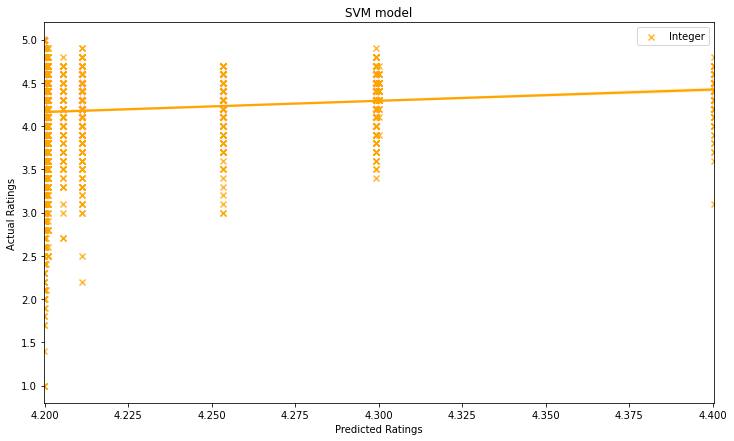

In [156]:
plt.figure(figsize=(12,7))
sns.regplot(results2,y_test,color='orange', label = 'Integer', marker = 'x')
plt.legend()
plt.title('SVM model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

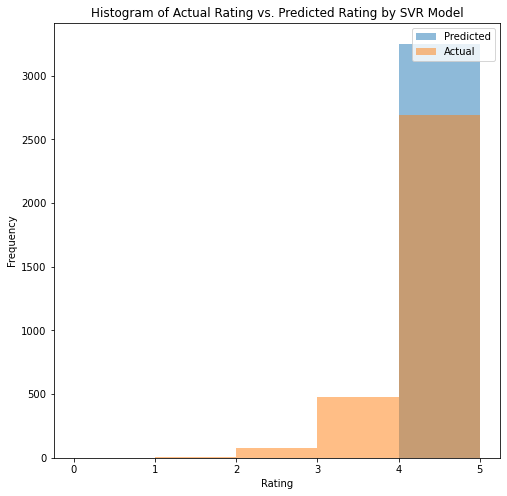

In [157]:
plt.hist(results2, bins_list, alpha=0.5, label='Predicted')
plt.hist(y_te, bins_list, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by SVR Model')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [158]:
print(results2.mean(), results2.std())

4.232174276086288 0.05647907406251045


## 3) Random Forest Regressor Model

In [159]:
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
results3 = model3.predict(X_test)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,results3, name = 'RFR - Integer'),ignore_index = True)

In [160]:
print(model3.score(X_test,y_test))

0.018747877850005312


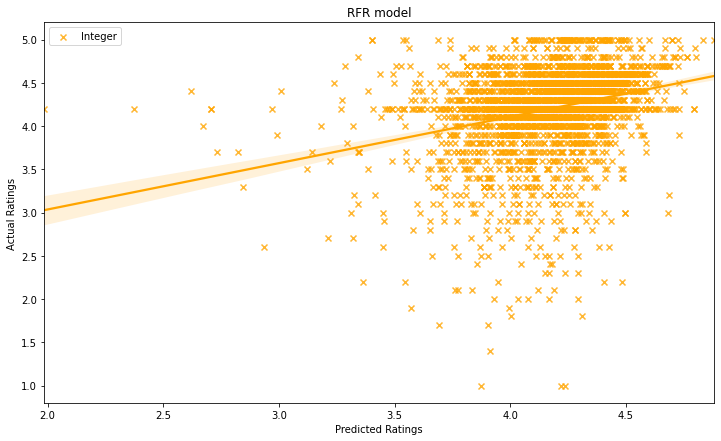

In [161]:
plt.figure(figsize=(12,7))
sns.regplot(results3,y_test,color='orange', label = 'Integer', marker = 'x')
plt.legend()
plt.title('RFR model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

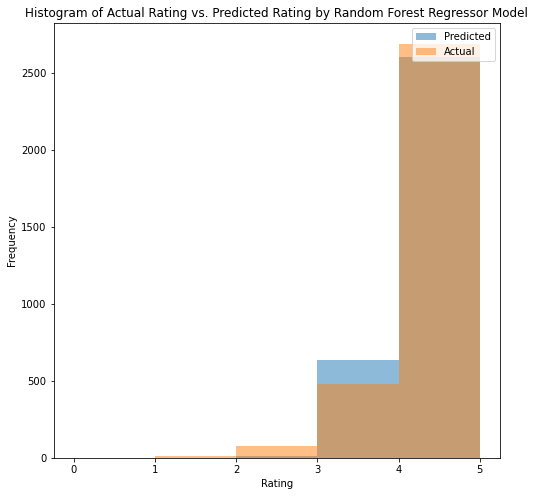

In [162]:
plt.hist(results3, bins_list, alpha=0.5, label='Predicted')
plt.hist(y_te, bins_list, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by Random Forest Regressor Model')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [163]:
print(results3.mean(), results3.std())

4.181193608789322 0.25512502180961205


#### Comparing the models

In [164]:
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00654918,0.312813,0.21881
1,SVM - Integer,0.0195599,0.296857,0.215944
2,RFR - Integer,0.0187479,0.309707,0.216123


## 2. Dummy Coded + Median Imputed
##### a) Feature selection

In [165]:
df2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated',
       'Month', 'Category_int', 'Genres_int', 'Type_int', 'ContentRating_int',
       'Rating_mean', 'Size_mean', 'Rating_med', 'Size_med',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_

In [166]:
# Features selection
X_d = df2.drop(labels = ['Rating', 'Last Updated', 'Category_int', 'Genres_int', 'Type_int',
       'ContentRating_int', 'Rating_mean', 'Size_mean', 'Rating_med',
       'Size_med',],axis = 1)

In [167]:
# Label selection
y_d = df2.Rating_med

In [168]:
# For testing purpose
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

## 1) Linear Regression

In [169]:
# Train the model on the train split
lm = LinearRegression().fit(X_train_d,y_train_d)

In [170]:
#make predictions using the model on both train and test splits
y_tr_pred = lm.predict(X_train_d)
y_te_pred = lm.predict(X_test_d)

In [171]:
results_d = y_te_pred
results_d

array([4.27657873, 4.2948743 , 4.21963347, ..., 4.27385267, 4.20496633,
       4.15805388])

In [172]:
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,results_d, name = 'Linear - Dummy'),ignore_index = True)

In [173]:
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00654918,0.312813,0.21881
1,SVM - Integer,0.0195599,0.296857,0.215944
2,RFR - Integer,0.0187479,0.309707,0.216123
3,Linear - Dummy,0.0436659,0.308964,0.211068


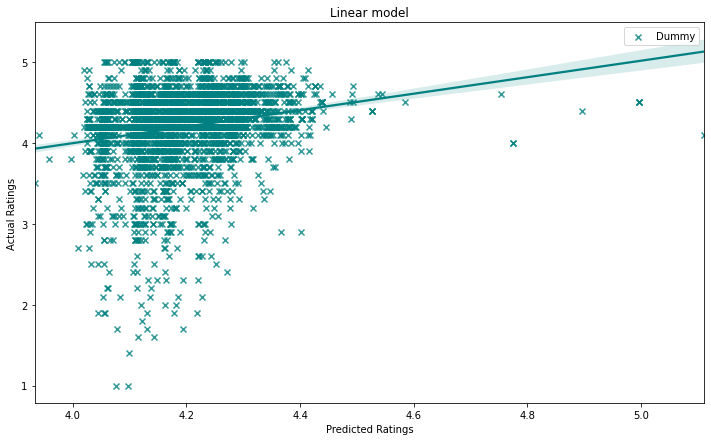

In [174]:
plt.figure(figsize=(12,7))
sns.regplot(results_d,y_test_d,color='teal', label = 'Dummy', marker = 'x')
plt.legend()
plt.title('Linear model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

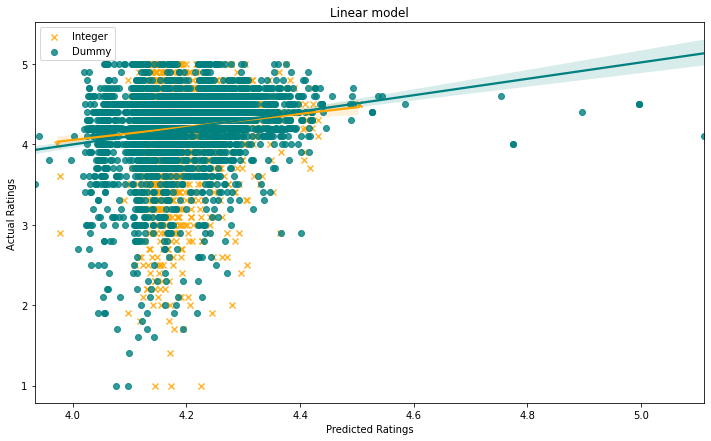

In [175]:
plt.figure(figsize=(12,7))
sns.regplot(results,y_test,color='orange', label = 'Integer', marker = 'x')
sns.regplot(results_d,y_test_d,color='teal',label = 'Dummy')
plt.legend()
plt.title('Linear model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

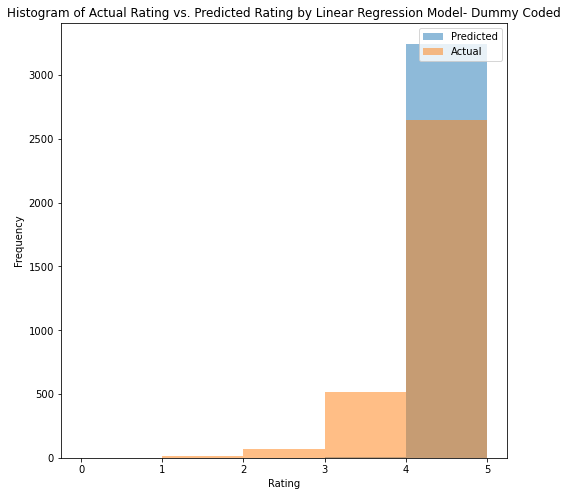

In [176]:
plt.hist(results_d, bins_list, alpha=0.5, label='Predicted')
plt.hist(y_test_d, bins_list, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by Linear Regression Model- Dummy Coded')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [177]:
print(results.mean(), results.std())

4.186988339767238 0.05267327501840234


In [178]:
results_d_df = pd.DataFrame(results_d)

In [179]:
actualindex1 = []
for i in range(0, len(y_test_d)):
    if y_test_d[i]<2:
        actualindex1.append(i)
        
predicted1 = []
for i in results:
    predicted1 = results_d_df.iloc[actualindex1]
    
predicted1 = predicted1.to_numpy()

In [180]:
actualindex2 = []
for i in range(0, len(y_test_d)):
    if 2<=y_test_d[i]<3:
        actualindex2.append(i)
        
predicted2 = []
for i in results:
    predicted2 = results_d_df.iloc[actualindex2]
    
predicted2 = predicted2.to_numpy()

In [181]:
actualindex3 = []
for i in range(0, len(y_test_d)):
    if 2<=y_test_d[i]<3:
        actualindex3.append(i)
        
predicted3 = []
for i in results:
    predicted3 = results_d_df.iloc[actualindex3]
    
predicted3 = predicted3.to_numpy()

In [182]:
actualindex4 = []
for i in range(0, len(y_test_d)):
    if 3<=y_test_d[i]<4:
        actualindex4.append(i)
        
predicted4 = []
for i in results:
    predicted4 = results_d_df.iloc[actualindex4]
    
predicted4 = predicted4.to_numpy()
len(predicted4)

517

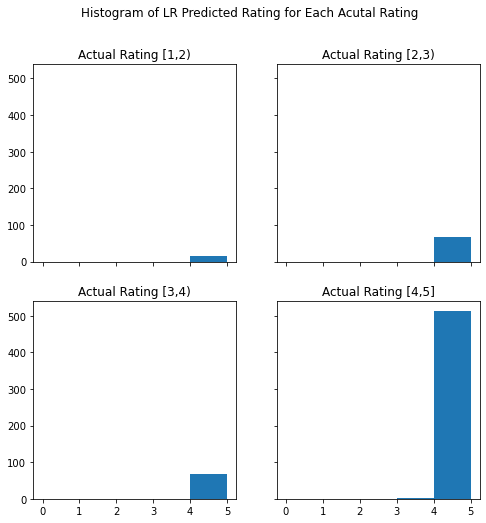

In [183]:
fig,axs = plt.subplots(2,2,sharex=True, sharey=True)
fig.suptitle('Histogram of LR Predicted Rating for Each Acutal Rating')
axs[0,0].hist(predicted1,bins_list)
axs[0,0].set_title('Actual Rating [1,2)');
axs[0,1].hist(predicted2,bins_list)
axs[0,1].set_title('Actual Rating [2,3)');
axs[1,0].hist(predicted3,bins_list)
axs[1,0].set_title('Actual Rating [3,4)');
axs[1,1].hist(predicted4,bins_list)
axs[1,1].set_title('Actual Rating [4,5]');

### 2) Elipson-Support Vector Regression (SVR) Model

In [184]:
model2 = svm.SVR()
model2.fit(X_train_d,y_train_d)

results2_d = model2.predict(X_test_d)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,results2_d, name = 'SVM - Dummy'),ignore_index = True)

In [185]:
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00654918,0.312813,0.21881
1,SVM - Integer,0.0195599,0.296857,0.215944
2,RFR - Integer,0.0187479,0.309707,0.216123
3,Linear - Dummy,0.0436659,0.308964,0.211068
4,SVM - Dummy,-0.0115509,0.303702,0.223255


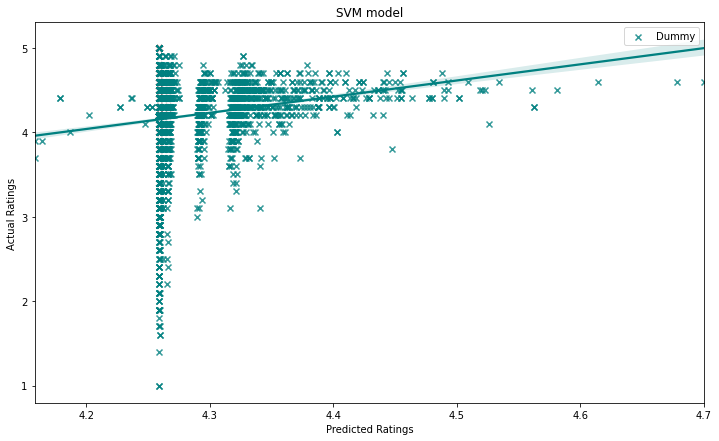

In [186]:
plt.figure(figsize=(12,7))
sns.regplot(results2_d,y_test_d,color='teal', label = 'Dummy', marker = 'x')
plt.legend()
plt.title('SVM model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

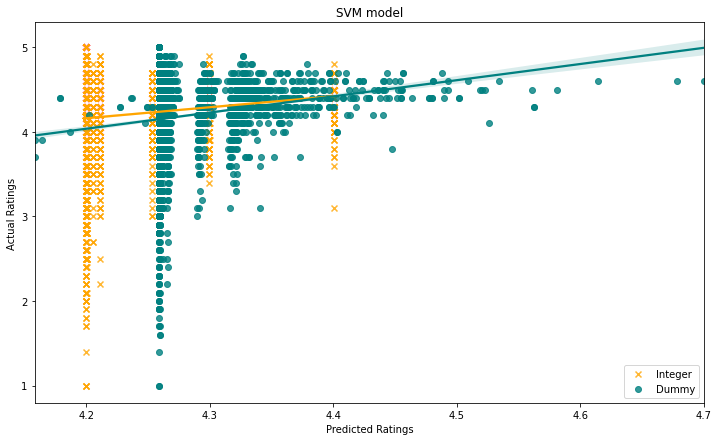

In [187]:
plt.figure(figsize=(12,7))
sns.regplot(results2,y_test,color='orange', label = 'Integer', marker = 'x')
sns.regplot(results2_d,y_test_d,color='teal',label = 'Dummy')
plt.legend()
plt.title('SVM model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

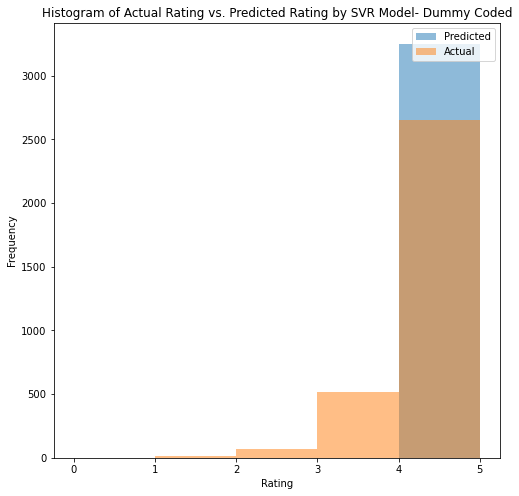

In [188]:
plt.hist(results2_d, bins_list, alpha=0.5, label='Predicted')
plt.hist(y_test_d, bins_list, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by SVR Model- Dummy Coded')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [189]:
print(results2.mean(), results2.std())

4.232174276086288 0.05647907406251045


## 3) Random Forest Regressor Model

In [190]:
model3 = RandomForestRegressor()
model3.fit(X_train_d,y_train_d)
results3_d = model3.predict(X_test_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,results3, name = 'RFR - Dummy'),ignore_index = True)

In [191]:
print(model3.score(X_test_d,y_test_d))

0.16408467705678254


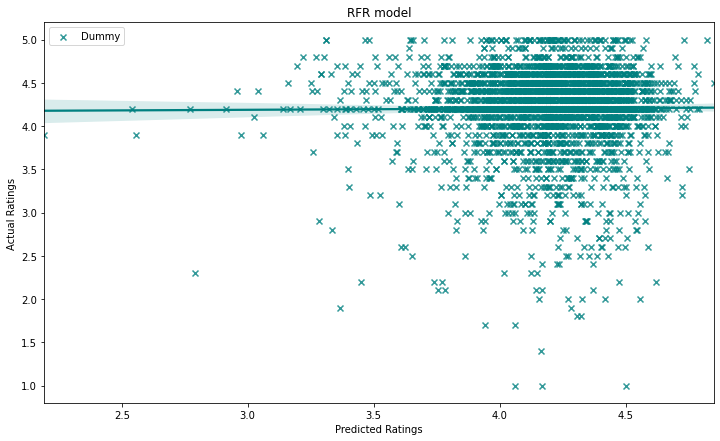

In [192]:
plt.figure(figsize=(12,7))
sns.regplot(results3_d,y_test,color='teal', label = 'Dummy', marker = 'x')
plt.legend()
plt.title('RFR model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

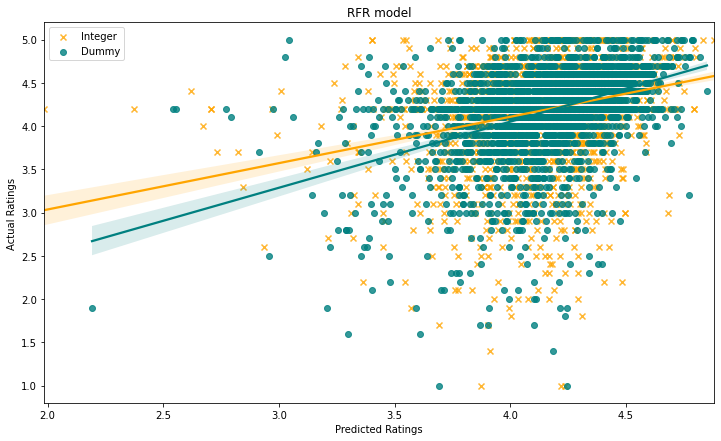

In [193]:
plt.figure(figsize=(12,7))
sns.regplot(results3,y_test,color='orange', label = 'Integer', marker = 'x')
sns.regplot(results3_d,y_test_d,color='teal',label = 'Dummy')
plt.legend()
plt.title('RFR model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

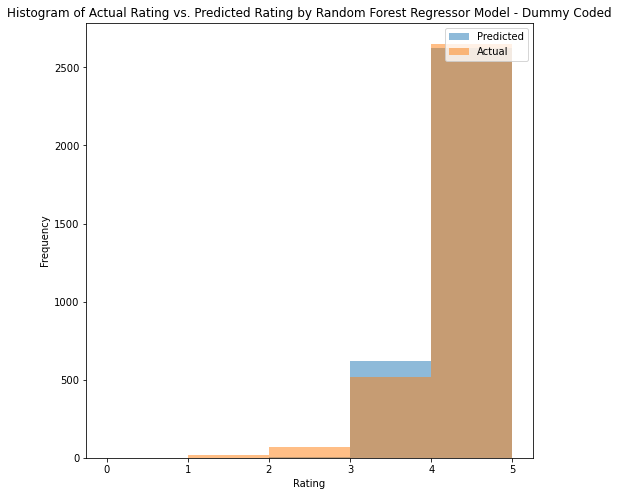

In [194]:
plt.hist(results3_d, bins_list, alpha=0.5, label='Predicted')
plt.hist(y_test_d, bins_list, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by Random Forest Regressor Model - Dummy Coded')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [195]:
print(results3.mean(), results3.std())

4.181193608789322 0.25512502180961205


In [196]:
accuracy = float(np.sum(results3_d==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.000000


## 3. Comparing the models

In [197]:
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00654918,0.312813,0.21881
1,SVM - Integer,0.0195599,0.296857,0.215944
2,RFR - Integer,0.0187479,0.309707,0.216123
3,Linear - Dummy,0.0436659,0.308964,0.211068
4,SVM - Dummy,-0.0115509,0.303702,0.223255
5,RFR - Dummy,0.0187479,0.309707,0.216123


#### Based on the results and looking at the histograms of prediced vs. actual values, we can conclude that the Random Forest Regressor Model is the best model for our analysis and whether the variables are dummy coded does not seem to matter in this case.

#### Just to further clarify, histograms for model predicted rating for each actual rating is plotted.

In [198]:
results3_d_df = pd.DataFrame(results3_d)
y_test_d_df = pd.DataFrame(y_test_d)

In [199]:
results3_d_df

,0
0,4.153000
1,4.433000
2,4.582000
3,4.241753
4,4.155000
...,...
3247,4.019928
3248,4.071000
3249,4.318000
3250,4.057000


In [200]:
y_test_d_df

,Rating_med
App,
Q Wunder,3.800000
EmuBox - Fast Retro Emulator,3.900000
Meditate OM,4.500000
Mini for Facebook lite,4.100000
Voice Changer,4.100000
...,...
Calcium Pro,3.400000
Forgotten Hill: Surgery,4.500000
LEGO® Friends: Heartlake Rush,4.500000


In [201]:
results3_d_np = np.array(results3_d_df)
y_test_d_np = np.array(y_test_d_df)
diff = results3_d_np-y_test_d_np
diff

array([[ 0.353     ],
       [ 0.533     ],
       [ 0.082     ],
       ...,
       [-0.182     ],
       [-0.143     ],
       [-0.01534059]])

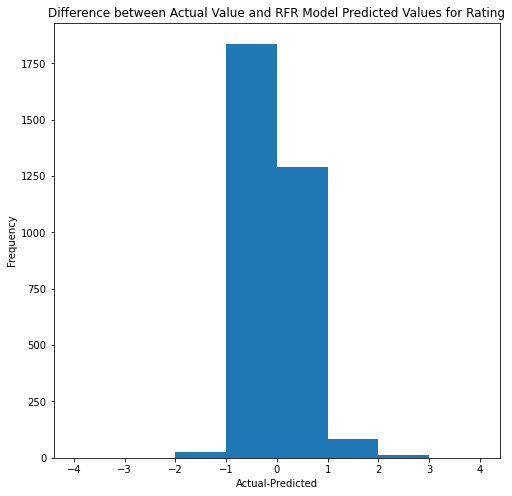

In [202]:
bins_list = [-4,-3,-2,-1,0,1,2,3,4]
plt.hist(diff,bins=bins_list)
plt.title('Difference between Actual Value and RFR Model Predicted Values for Rating')
plt.xlabel('Actual-Predicted')
plt.ylabel('Frequency')
plt.show()

#### For actual rating = [1,2)

In [203]:
# For Actual Rating = [1,2)
actualindex = []
for i in range(0, len(y_test_d)):
    if y_test_d[i]<2:
        actualindex.append(i)

predicted = []
for i in results:
    predicted = results3_d_df.iloc[actualindex]
    
predicted = predicted.to_numpy()

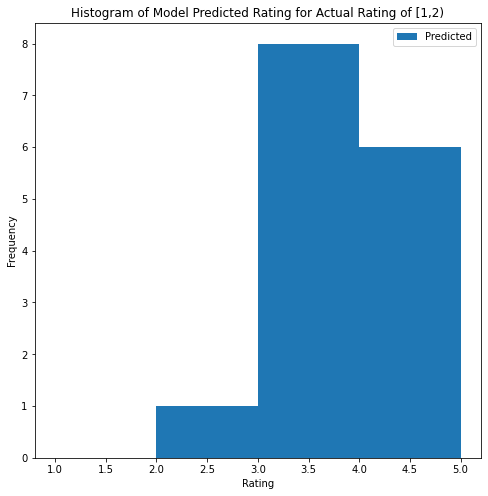

In [204]:
bins_list = [1,2,3,4,5]
plt.hist(predicted, bins_list, label='Predicted')
plt.legend(loc='upper right')
plt.title('Histogram of Model Predicted Rating for Actual Rating of [1,2)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### For actual rating = [2,3)

In [205]:
actualindex2 = []
for i in range(0, len(y_test_d)):
    if 2<=y_test_d[i]<3:
        actualindex2.append(i)
        
predicted2 = []
for i in results:
    predicted2 = results3_d_df.iloc[actualindex2]
    
predicted2 = predicted2.to_numpy()

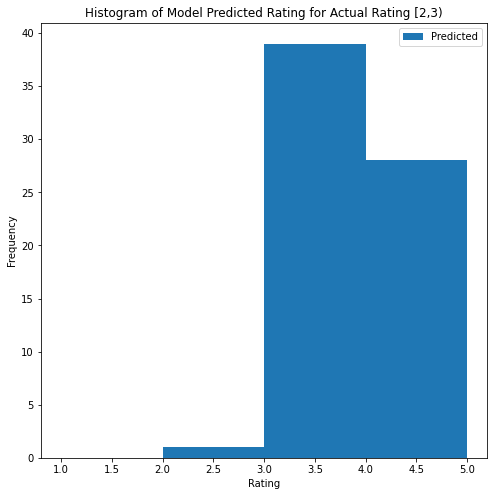

In [206]:
plt.hist(predicted2, bins_list, label='Predicted')
plt.legend(loc='upper right')
plt.title('Histogram of Model Predicted Rating for Actual Rating [2,3)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### For actual rating = [3,4)

In [207]:
actualindex3 = []
for i in range(0, len(y_test_d)):
    if 3<=y_test_d[i]<4:
        actualindex3.append(i)
        
predicted3 = []
for i in results:
    predicted3 = results3_d_df.iloc[actualindex3]
    
predicted3 = predicted3.to_numpy()

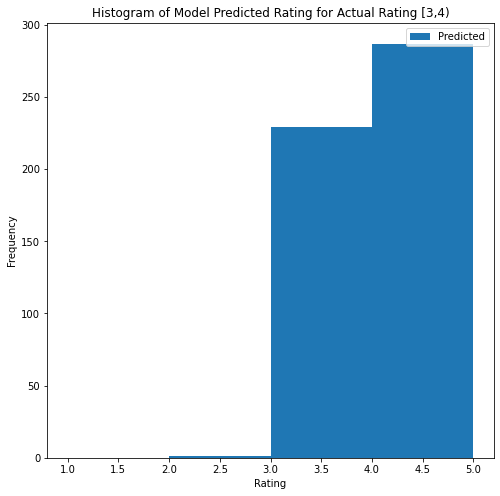

In [208]:
plt.hist(predicted3, bins_list, label='Predicted')
plt.legend(loc='upper right')
plt.title('Histogram of Model Predicted Rating for Actual Rating [3,4)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### For actual rating = [4,5]

In [209]:
actualindex4 = []
for i in range(0, len(y_test_d)):
    if 4<=y_test_d[i]<=5:
        actualindex4.append(i)
        
predicted4 = []
for i in results:
    predicted4 = results3_d_df.iloc[actualindex4]
    
predicted4 = predicted4.to_numpy()

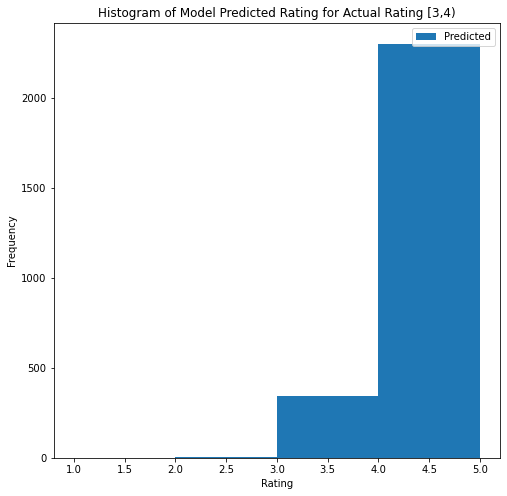

In [210]:
plt.hist(predicted4, bins_list, label='Predicted')
plt.legend(loc='upper right')
plt.title('Histogram of Model Predicted Rating for Actual Rating [3,4)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

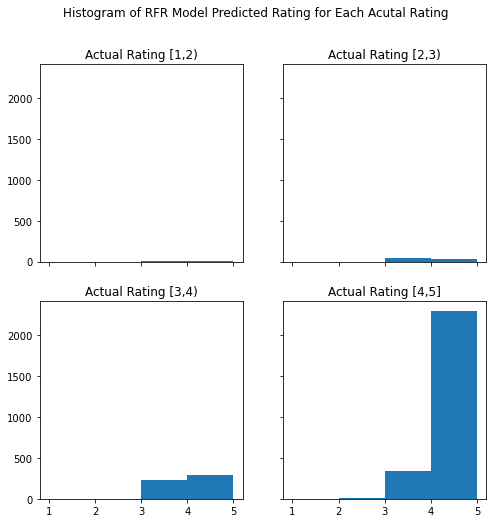

In [211]:
fig,axs = plt.subplots(2,2,sharex=True, sharey=True)
fig.suptitle('Histogram of RFR Model Predicted Rating for Each Acutal Rating')
axs[0,0].hist(predicted,bins_list)
axs[0,0].set_title('Actual Rating [1,2)');
axs[0,1].hist(predicted2,bins_list)
axs[0,1].set_title('Actual Rating [2,3)');
axs[1,0].hist(predicted3,bins_list)
axs[1,0].set_title('Actual Rating [3,4)');
axs[1,1].hist(predicted4,bins_list)
axs[1,1].set_title('Actual Rating [4,5]');

### XGBoost 

In [212]:
# Import xgboost
import xgboost as xgb

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(n_estimators=10, objective='binary:logistic', seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: results4
results4 = xg_cl.predict(X_test)

# Ecaluation Matrix
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,results4, name = 'XGBoost'),ignore_index = True)
resultsdf

,Series Name,R Squared Score,Mean Absolute Error,Mean Squared Error
0,Linear - Integer,0.00654918,0.312813,0.21881
1,SVM - Integer,0.0195599,0.296857,0.215944
2,RFR - Integer,0.0187479,0.309707,0.216123
3,Linear - Dummy,0.0436659,0.308964,0.211068
4,SVM - Dummy,-0.0115509,0.303702,0.223255
5,RFR - Dummy,0.0187479,0.309707,0.216123
6,XGBoost,-0.143975,0.329628,0.278497


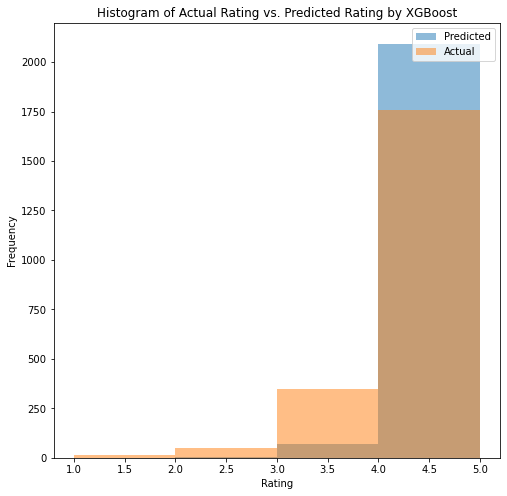

In [213]:
plt.hist(results4, bins_list, alpha=0.5, label='Predicted')
plt.hist(y_test, bins_list, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Histogram of Actual Rating vs. Predicted Rating by XGBoost')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## VI. Model Selection

In [214]:
# Features selection
X_d = df2.drop(labels = ['Rating', 'Last Updated', 'Category_int', 'Genres_int', 'Type_int',
       'ContentRating_int', 'Rating_mean', 'Size_mean', 'Rating_med',
       'Size_med',],axis = 1)

In [215]:
# Label selection
y_d = df2.Rating_med

In [216]:
# For testing purpose
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

#### 1. Define the pipeline

In [217]:
pipeall = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression,k='all'),
    LinearRegression()
)

#### 2. Fit the pipeline
fit: combines imputation and scaling, and then trains the model

In [218]:
pipeall.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x00000277CFB84670>)),
                ('linearregression', LinearRegression())])

#### 3. Make Prediction and Assess performance on Train and Test Data

In [219]:
y_tr_pred = pipeall.predict(X_train)
y_te_pred = pipeall.predict(X_test)

In [220]:
# R squared
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.012350222243325493, 0.005288989437220115)

In [221]:
# Mean Absolute Error
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.310673095964621, 0.32528841787891605)

Text(0, 0.5, 'Predictions')

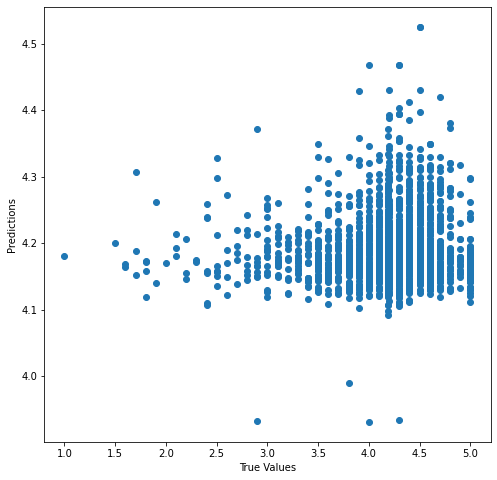

In [222]:
## The line / model
plt.scatter(y_test, y_te_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

#### 4. Cross-Validation

In [223]:
cv_results = cross_validate(pipeall, X_train, y_train, cv=5)

In [224]:
cv_results

{'fit_time': array([0.01100063, 0.01099992, 0.01100016, 0.01099777, 0.01200175]),
 'score_time': array([0.00300026, 0.00199962, 0.00299978, 0.00299931, 0.00300097]),
 'test_score': array([0.0155933 , 0.01316094, 0.00731051, 0.00879   , 0.00594739])}

In [225]:
cv_scores = cv_results['test_score']
cv_scores

array([0.0155933 , 0.01316094, 0.00731051, 0.00879   , 0.00594739])

In [226]:
np.mean(cv_scores), np.std(cv_scores)

(0.01016042703772142, 0.0036405759490924076)

In [227]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.  , 0.02])

#### 5. Hyperparameter search using GridSearchCV


In [228]:
pipeall.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [229]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [230]:
lr_grid_cv = GridSearchCV(pipeall, param_grid=grid_params, cv=5, n_jobs=-1)

In [231]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k='all',
                                                    score_func=<function f_regression at 0x00000277CFB84670>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8]})

In [232]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [233]:
lr_grid_cv.best_params_

{'selectkbest__k': 8}

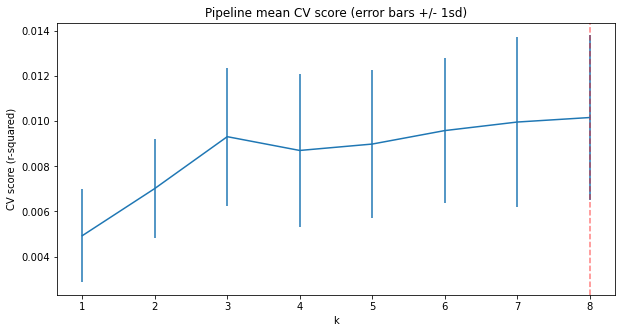

In [234]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [235]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [236]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Size_med             0.036100
Type_int             0.025643
Installs             0.023056
Genres_int           0.013899
Month                0.006598
ContentRating_int   -0.009456
Price               -0.012697
Category_int        -0.023114
dtype: float64

#### 6. Random Forest Model

In [237]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))

0.3173109436816144


In [238]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=50)
)

In [239]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [240]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([ 0.03763352,  0.03066009,  0.09457778, -0.01274015, -0.02592082])

In [241]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.02484208324330983, 0.042543704209704096)

In [242]:
y_predicted = forest_model.predict(X_test)

#### 7. Hyperparameter search using GridSearchCV

In [243]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [244]:
rf_grid_cv = GridSearchCV(RF_pipe, grid_params, param_grid=dict, cv=5, n_jobs=-1)

In [245]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=50))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [246]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 1000,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [247]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([ 0.04007238,  0.04363297,  0.1018205 , -0.00781352, -0.00929767])

In [248]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.033682933119335415, 0.04087014571169551)

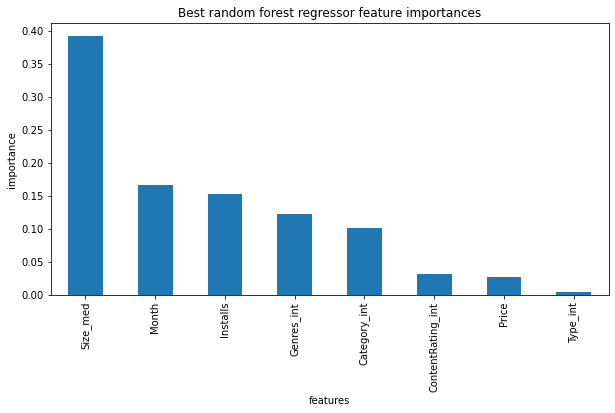

In [249]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

#### 8. Selecting Models

#### Linear Regression Model

In [250]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [251]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(0.31094745797471474, 0.0043382302383395376)

In [252]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

0.32528841787891605

#### Random Forest Model

In [253]:
rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, n_jobs=-1)

In [254]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(-0.033682933119335415, 0.04087014571169551)

In [255]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(X_test))

0.3144193075593406